In [142]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import cv2

import requests
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pylab as pylab
import cv2
import math
import torch
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import numpy as np
import matplotlib.colorbar as colorbar

import requests
from io import BytesIO
from PIL import Image
import numpy as np
from maskrcnn_benchmark.utils import cv2_util
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

from moviepy.editor import VideoFileClip

# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20*1.5, 12*1.5

from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.structures.keypoint import keypoints_to_heat_map
from maskrcnn_benchmark.modeling.roi_heads.keypoint_head.loss import project_keypoints_to_heatmap
from demo.predictor import COCODemo


from moviepy.editor import VideoFileClip

# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.structures.keypoint import keypoints_to_heat_map
from maskrcnn_benchmark.modeling.roi_heads.keypoint_head.loss import project_keypoints_to_heatmap
#from predictor import COCODemo

In [39]:
import h5py
log_error_rmse_file = "error_file_standard_2_1"
standard_array = []
with h5py.File(log_error_rmse_file, "r") as f:
    hm2 = f.get('heatmaps_loss')[()][0:10000]
    dploss2 = f.get('loss_centerness')[()][0:10000] + f.get('loss_cls')[()][0:10000]+ f.get('loss_kps')[()][0:10000]
    mseb2 = f.get('train_mse')[()][0:10000] 
    ks = list(f.keys())
    print(list(f.keys()))
    dset = f[ks[3]]
    print("dset: ", dset)
    for idx, dd in enumerate(dset[10:100]):
        print(idx,":", dd)

['heatmaps_loss', 'loss_centerness', 'loss_cls', 'loss_kps', 'train_mse']
dset:  <HDF5 dataset "loss_kps": shape (180000,), type "<f8">
0 : 2.746729850769043
1 : 2.732556104660034
2 : 2.676682472229004
3 : 2.765369176864624
4 : 2.754361867904663
5 : 2.7102086544036865
6 : 2.805769681930542
7 : 2.5332696437835693
8 : 2.5229716300964355
9 : 2.889503002166748
10 : 3.027374744415283
11 : 2.8409152030944824
12 : 2.7162766456604004
13 : 2.781829357147217
14 : 2.7194504737854004
15 : 2.747992992401123
16 : 2.5074045658111572
17 : 2.6826117038726807
18 : 2.561098098754883
19 : 2.6375224590301514
20 : 2.6199026107788086
21 : 2.587707757949829
22 : 2.7533953189849854
23 : 2.803109884262085
24 : 2.7005443572998047
25 : 2.640052318572998
26 : 2.614164113998413
27 : 2.8511428833007812
28 : 2.670137405395508
29 : 2.723897933959961
30 : 2.4337027072906494
31 : 2.875485420227051
32 : 2.333946704864502
33 : 2.7037153244018555
34 : 2.5003724098205566
35 : 2.7281110286712646
36 : 2.761044979095459
37 : 2

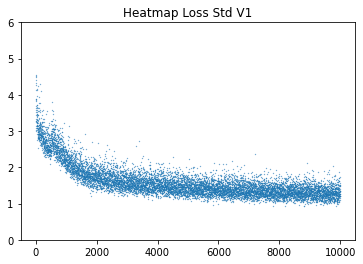

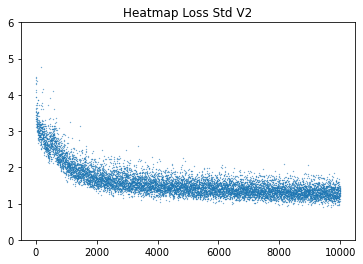

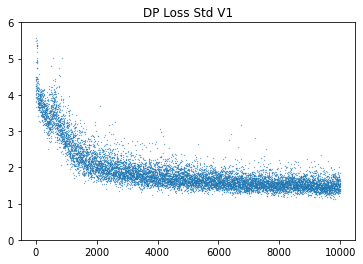

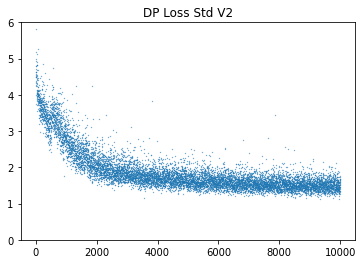

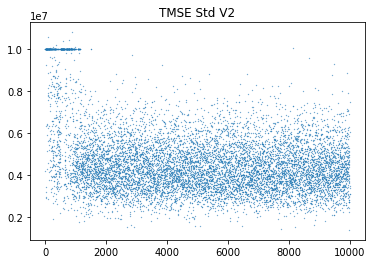

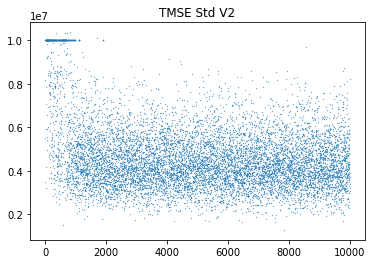

In [41]:
import matplotlib.pyplot as plt
hm = (data_hmloss[0:10000])
#hm2 = 
iters = range(0,10000)
plt.ylim([0, 6])
#plt.plot(iters, hm, '-o' ,s=.1)
plt.scatter(iters, hm,s=.07)
plt.title("Heatmap Loss Std V1")
plt.show()

plt.ylim([0, 6])
plt.scatter(iters, hm2,s=.07)
plt.title("Heatmap Loss Std V2")
plt.show()

plt.ylim([0, 6])
plt.scatter(iters, dploss,s=.07)
plt.title("DP Loss Std V1")
plt.show()

plt.ylim([0, 6])
plt.scatter(iters, dploss2,s=.07)
plt.title("DP Loss Std V2")
plt.show()

#plt.ylim([0, 6])
plt.scatter(iters, mseb,s=.07)
plt.title("TMSE Std V2")
plt.show()

#plt.ylim([0, 6])
plt.scatter(iters, mseb2,s=.07)
plt.title("TMSE Std V2")
plt.show()


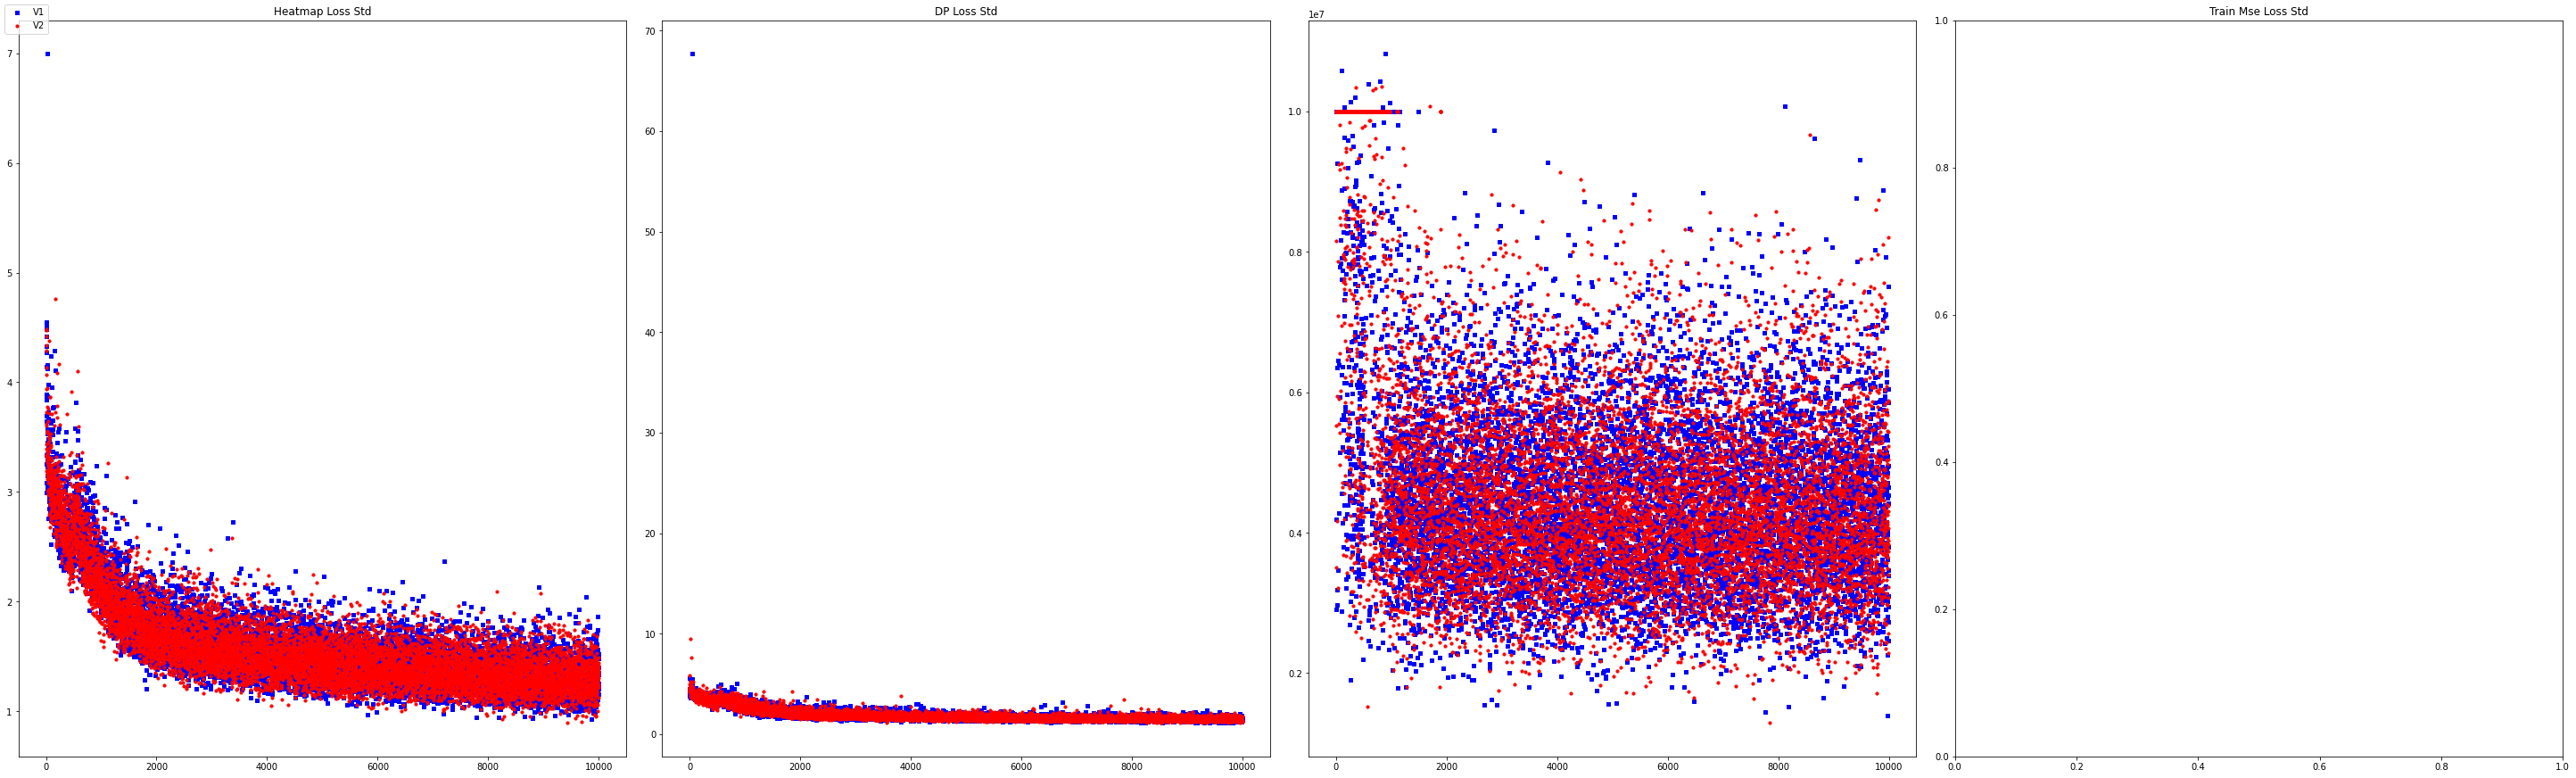

In [59]:
x = range(100)
y = range(100,200)
#fig = plt.figure()
fig, axes = plt.subplots(1,4,figsize=(40,12),constrained_layout=True)

axes[0].title.set_text("Heatmap Loss Std")
axes[0].scatter(iters, hm, s=10, c='b', marker="s", label='V1')
axes[0].scatter(iters,hm2, s=10, c='r', marker="o", label='V2')
fig.legend(loc='upper left')
plt.title("Heatmap Loss Std")


axes[1].title.set_text("DP Loss Std")
axes[1].scatter(iters, dploss, s=10, c='b', marker="s", label='V1')
axes[1].scatter(iters,dploss2, s=10, c='r', marker="o", label='V2')
#fig.legend(loc='upper left')
plt.title("DP Loss Std")

axes[2].scatter(iters, mseb, s=10, c='b', marker="s", label='V1')
axes[2].scatter(iters,mseb2, s=10, c='r', marker="o", label='V2')
#fig.legend(loc='upper left')
plt.title("Train Mse Loss Std")

fig.savefig("Std 10k2" +'.png')
plt.show()

In [120]:
import h5py
versions = ["1","2","3"]
alphas = [".0001", ".001", ".01", ".1"]
log_error_rmse_file = "error_file_standard_2_1"
values = [[[],[],[]],[[],[],[]],[[],[],[]],[[],[],[]]]
for a, alpha in enumerate(alphas):
    for b, version in enumerate(versions):
        log_file = "error_file_combined_f25_" + str(version) + "_" + str(alpha)
        with h5py.File(log_file, "r") as f:
            hml = f.get('heatmaps_loss')[()][0:7500]
            values[a][b].append(hml)
            dpl = f.get('loss_centerness')[()][0:7500] + f.get('loss_cls')[()][0:7500]+ f.get('loss_kps')[()][0:7500]
            values[a][b].append(dpl)
            mset = f.get('train_mse')[()][0:7500] 
            values[a][b].append(mset)
            values[a][b].append(f.get('combined_loss')[()][0:7500] )
print(values[0])

[[array([1.96668732, 1.78273869, 1.69186175, ..., 1.09431291, 1.56734121,
       1.40428209]), array([2.39648327, 2.36795437, 2.01541115, ..., 1.42713908, 1.61653426,
       1.35140189]), array([5127713.91797925, 4556085.7317488 , 5163873.53523641, ...,
       2993065.0934703 , 3270243.75735452, 3957182.08909176]), array([7.95489759e-05, 8.54023892e-05, 8.25675961e-05, ...,
       1.45770115e-04, 1.11677669e-04, 1.19480414e-04])], [array([1.57277727, 1.49562025, 1.38990033, ..., 1.51243591, 1.56300199,
       1.22099173]), array([1.90825894, 2.10467328, 1.85006487, ..., 2.04539603, 1.5644228 ,
       1.42582406]), array([3662692.09607829, 4113534.54361146, 4741854.29320122, ...,
       4241313.25491468, 3671324.03406751, 4234824.39713927]), array([9.33959018e-05, 1.02913305e-04, 1.02494043e-04, ...,
       1.08401509e-04, 1.27573978e-04, 1.08194537e-04])], [array([1.66900337, 1.48247886, 1.39275944, ..., 1.47840357, 1.05740011,
       1.16006148]), array([2.23785615, 1.82374203, 2.0079

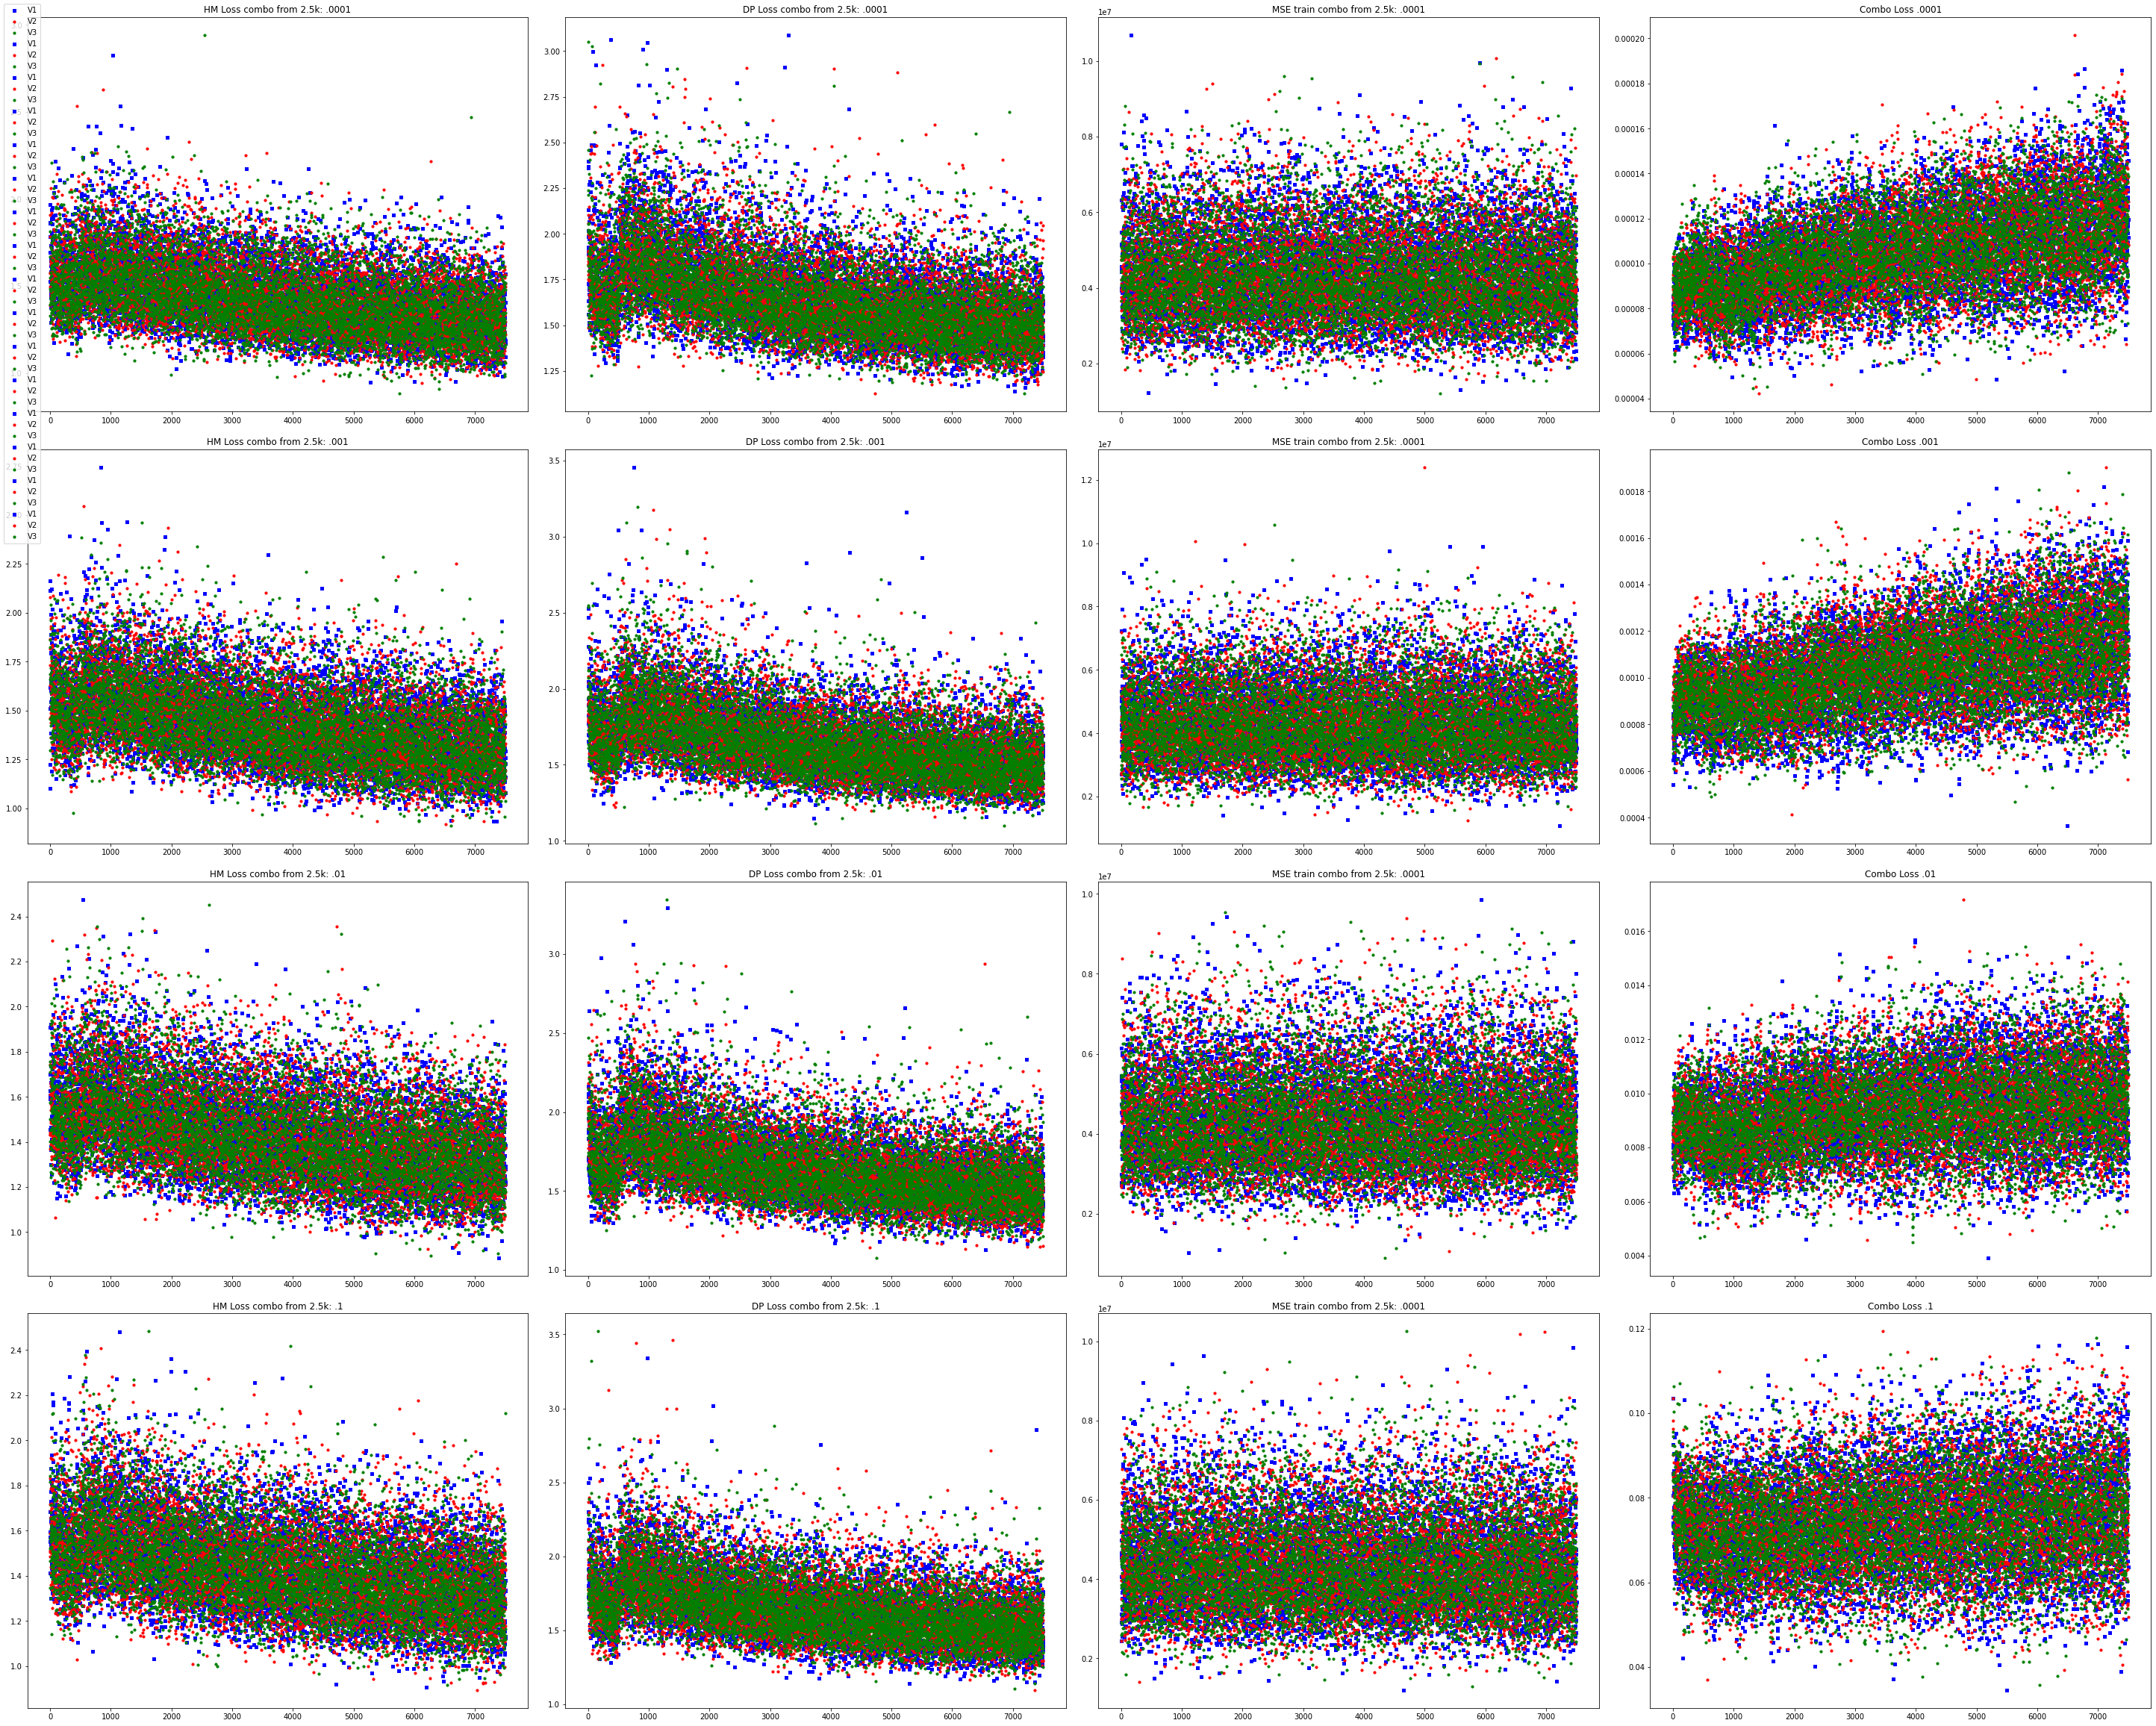

In [150]:
alphas = [".0001", ".001", ".01", ".1"]
cols = ["HM Loss", "DP Loss", "Train MSE", "C Loss"]
fig, axes = plt.subplots(4,4,figsize=(40,32),constrained_layout=True)
#titles = ["HM Loss combo from 2.5k: " + str(alphas[0]),"DP Loss combo from 2.5k: " + str(alphas[0]),"MSE train combo from 2.5k: " + str(alphas[0]), ("Combo Loss " + alpha)]
iters75 = range(0,7500)
for row, axe in enumerate(axes):
    for col, ax in enumerate(axe):
        titles = ["HM Loss combo from 2.5k: " + str(alphas[row]),"DP Loss combo from 2.5k: " + str(alphas[row]),"MSE train combo from 2.5k: " + str(alphas[i]),("Combo Loss " + alphas[row])]
        #print("idx",idx,"alpha",i)
        ax.title.set_text(titles[col])
        ax.scatter(iters75, values[row][0][col], s=10, c='b', marker="s", label='V1')
        ax.scatter(iters75,values[row][1][col], s=10, c='r', marker="o", label='V2')
        ax.scatter(iters75,values[row][2][col], s=10, c='g', marker="o", label='V3')
        #if idx == 3:
         #   plt.ylim([0, 4.5])
        #ax.scatter(iters75,values[0][3][idx], s=10, c='pink', marker="o", label='V3')
    
    #plt.title("Heatmap Loss Std")
fig.legend(loc='upper left')
fig.savefig("combo_7.5k3" +'.png')
plt.show()

In [90]:
test_mses = []
it75 = range(0,7501,500)
it75 = it75[1:]
for x in it75:
    print(x)

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500


In [183]:
#The new losses
# import matplotlib.pyplot as plt
def load(img_path):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    
    pil_image = Image.open(img_path).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

base = "../tools/datasets/bee/validation/"
#base = "../tools/datasets/bee/train/"
base_val = "../tools/datasets/bee/annotations/validation.json"
#base_val = "../tools/datasets/bee/annotations/train_bee_annotations2018_nondup.json"

import json
with open(base_val) as f:
    data_an = json.load(f)
#print(data_an["annotations"][0])

test_files = []
for p in data_an['images'][:]:
    test_files.append(str(p['file_name']))

print(test_files)
print(len(test_files))
test_images = []
for file in test_files:
    test_images.append(load(base + file))

import matplotlib.gridspec as gridspec
from itertools import chain

def bounding_box(points):
    x_coordinates, y_coordinates = zip(*points)
    return [min(x_coordinates), min(y_coordinates), max(x_coordinates), max(y_coordinates)]

def get_centroid(coord):
    return [(coord[0]+coord[2])/2, (coord[1]+coord[3])/2]

def get_dist(p1, p2):
    dist = math.hypot(p2[0] - p1[0], p2[1] - p1[1])
    return dist



['000000051501.jpg', '000000051602.jpg', '000000051656.jpg', '000000051770.jpg', '000000052209.jpg', '000000052239.jpg', '000000052248.jpg', '000000052271.jpg', '000000052328.jpg', '000000052361.jpg', '000000052413.jpg', '000000052563.jpg', '000000052583.jpg', '000000052587.jpg', '000000052738.jpg', '000000052799.jpg', '000000052861.jpg', '000000053184.jpg', '000000053247.jpg', '000000053341.jpg', '000000053573.jpg', '000000053614.jpg', '000000053776.jpg', '000000053802.jpg', '000000053827.jpg', '000000053842.jpg', '000000053857.jpg', '000000053866.jpg', '000000053890.jpg', '000000053916.jpg']
30


500 it
li:  <maskrcnn_benchmark.structures.image_list.ImageList object at 0x2b1fb7b325f8>
now prop
TARGETS:  None
feats:  5
feats:  1
feats:  256
props grcnn
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
None
R
T
raw res:
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
FIELDS:
predictions BoxList(num_boxes=100, image_width=2560, image_height=1440, mode=xyxy)
top preds BoxList(num_boxes=19, image_width=2560, image_height=1440, mode=xyxy)
51501
li:  <maskrcnn_benchmark.structures.image_list.ImageList object at 0x2b1fb7edf438>
now prop
TARGETS:  None
feats:  5
feats:  1
feats:  256
props grcnn
[BoxList(num_boxes=68, image_width=1422, image_height=800, mode=xyxy)]
[BoxList(num_boxes=68, image_width=1422, image_height=800, mode=xyxy)]
None
R
T
raw res:
[BoxList(num_boxes=68, image_width=1422, image_height=800, mode=xyxy)]
FIELDS:
predictions BoxList(num_boxes=68, image_w

52738
li:  <maskrcnn_benchmark.structures.image_list.ImageList object at 0x2b1fb7c61f28>
now prop
TARGETS:  None
feats:  5
feats:  1
feats:  256
props grcnn
[BoxList(num_boxes=77, image_width=1422, image_height=800, mode=xyxy)]
[BoxList(num_boxes=77, image_width=1422, image_height=800, mode=xyxy)]
None
R
T
raw res:
[BoxList(num_boxes=77, image_width=1422, image_height=800, mode=xyxy)]
FIELDS:
predictions BoxList(num_boxes=77, image_width=2560, image_height=1440, mode=xyxy)
top preds BoxList(num_boxes=17, image_width=2560, image_height=1440, mode=xyxy)
52799
li:  <maskrcnn_benchmark.structures.image_list.ImageList object at 0x2b1fb7c61be0>
now prop
TARGETS:  None
feats:  5
feats:  1
feats:  256
props grcnn
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
None
R
T
raw res:
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
FIELDS:
predictions BoxList(num_boxes=100, image_wi

li:  <maskrcnn_benchmark.structures.image_list.ImageList object at 0x2b1fb7cc15c0>
now prop
TARGETS:  None
feats:  5
feats:  1
feats:  256
props grcnn
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
None
R
T
raw res:
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
FIELDS:
predictions BoxList(num_boxes=100, image_width=2560, image_height=1440, mode=xyxy)
top preds BoxList(num_boxes=21, image_width=2560, image_height=1440, mode=xyxy)
51501
li:  <maskrcnn_benchmark.structures.image_list.ImageList object at 0x2b1f5e0a2518>
now prop
TARGETS:  None
feats:  5
feats:  1
feats:  256
props grcnn
[BoxList(num_boxes=86, image_width=1422, image_height=800, mode=xyxy)]
[BoxList(num_boxes=86, image_width=1422, image_height=800, mode=xyxy)]
None
R
T
raw res:
[BoxList(num_boxes=86, image_width=1422, image_height=800, mode=xyxy)]
FIELDS:
predictions BoxList(num_boxes=86, image_width=25

52738
li:  <maskrcnn_benchmark.structures.image_list.ImageList object at 0x2b1fb7cd21d0>
now prop
TARGETS:  None
feats:  5
feats:  1
feats:  256
props grcnn
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
None
R
T
raw res:
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
FIELDS:
predictions BoxList(num_boxes=100, image_width=2560, image_height=1440, mode=xyxy)
top preds BoxList(num_boxes=18, image_width=2560, image_height=1440, mode=xyxy)
52799
li:  <maskrcnn_benchmark.structures.image_list.ImageList object at 0x2b1fb7d51ac8>
now prop
TARGETS:  None
feats:  5
feats:  1
feats:  256
props grcnn
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
None
R
T
raw res:
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
FIELDS:
predictions BoxList(num_boxes=100, imag

li:  <maskrcnn_benchmark.structures.image_list.ImageList object at 0x2b1fb7eef208>
now prop
TARGETS:  None
feats:  5
feats:  1
feats:  256
props grcnn
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
None
R
T
raw res:
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
FIELDS:
predictions BoxList(num_boxes=100, image_width=2560, image_height=1440, mode=xyxy)
top preds BoxList(num_boxes=19, image_width=2560, image_height=1440, mode=xyxy)
51501
li:  <maskrcnn_benchmark.structures.image_list.ImageList object at 0x2b1fb7d51a58>
now prop
TARGETS:  None
feats:  5
feats:  1
feats:  256
props grcnn
[BoxList(num_boxes=60, image_width=1422, image_height=800, mode=xyxy)]
[BoxList(num_boxes=60, image_width=1422, image_height=800, mode=xyxy)]
None
R
T
raw res:
[BoxList(num_boxes=60, image_width=1422, image_height=800, mode=xyxy)]
FIELDS:
predictions BoxList(num_boxes=60, image_width=25

52738
li:  <maskrcnn_benchmark.structures.image_list.ImageList object at 0x2b1fb7bd36a0>
now prop
TARGETS:  None
feats:  5
feats:  1
feats:  256
props grcnn
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
None
R
T
raw res:
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
FIELDS:
predictions BoxList(num_boxes=100, image_width=2560, image_height=1440, mode=xyxy)
top preds BoxList(num_boxes=18, image_width=2560, image_height=1440, mode=xyxy)
52799
li:  <maskrcnn_benchmark.structures.image_list.ImageList object at 0x2b1fb7bd36a0>
now prop
TARGETS:  None
feats:  5
feats:  1
feats:  256
props grcnn
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
None
R
T
raw res:
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
FIELDS:
predictions BoxList(num_boxes=100, imag

KeyboardInterrupt: 

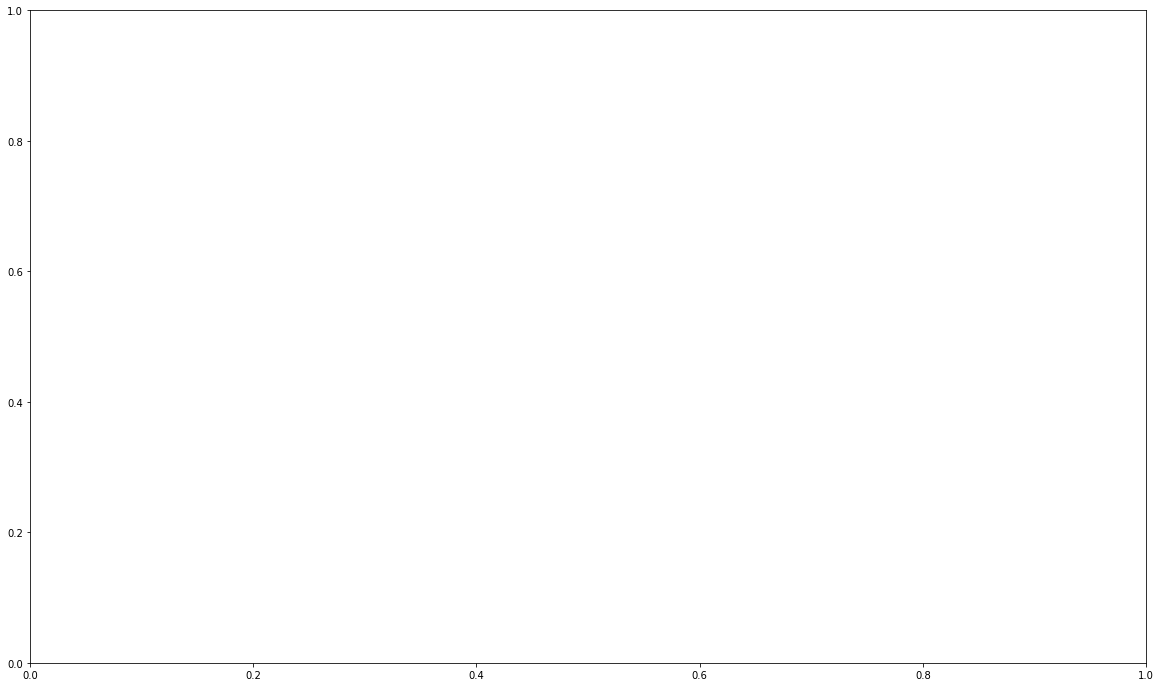

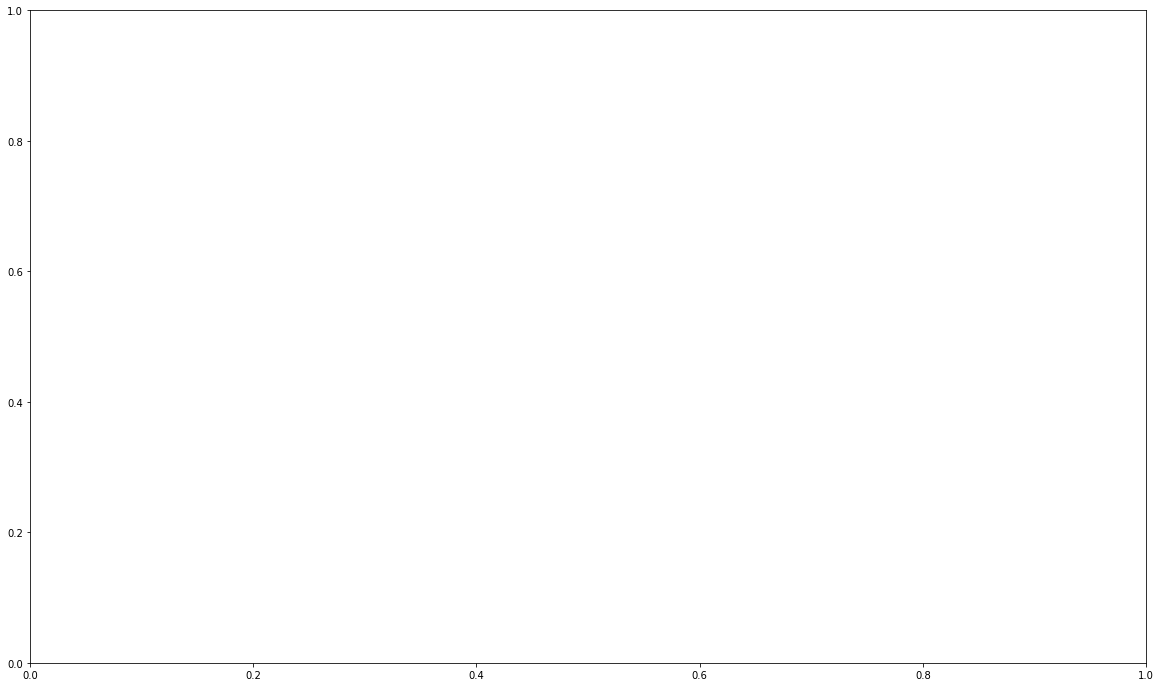

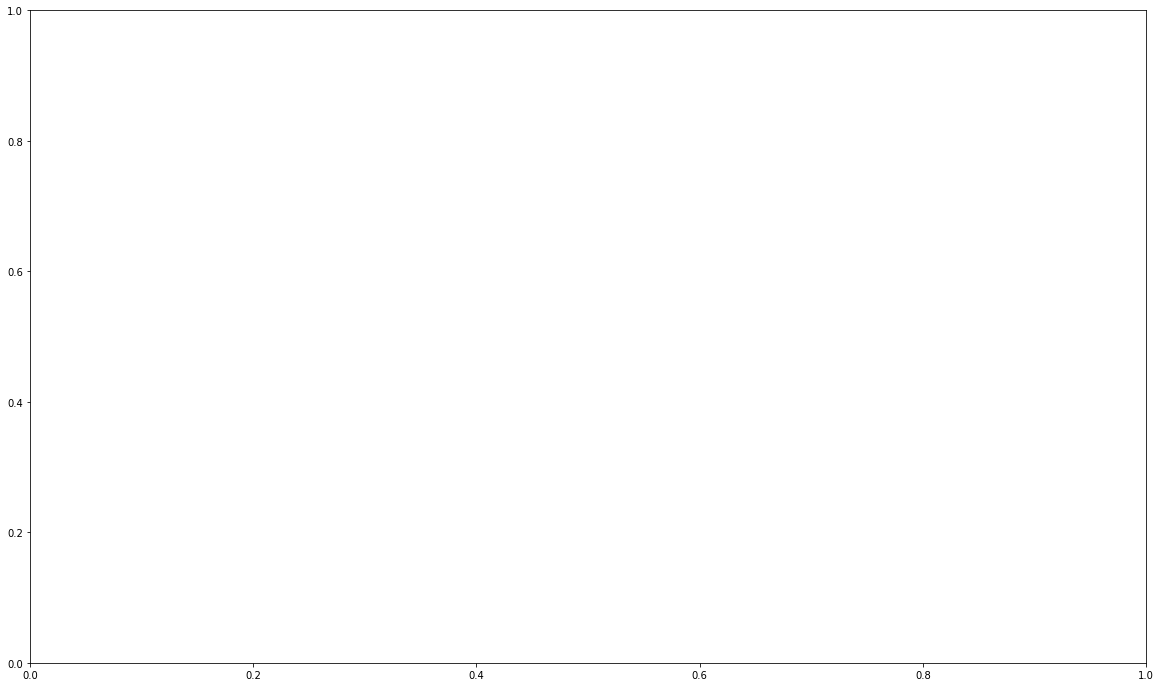

In [193]:
# GET STD MSES

data_size = "250"
versions = ["0"]
it200 = range(0,2500,500)
it200 = it200[1:]

loss = "standard_test_lr_f75"
test_std = []
#std_0_to_7500_dict = []
#std_0_to_7500 = []
s75_to_90 = []
s75_to_90_dict = []

for v,version in enumerate(versions):
    for i,it in enumerate(it200):
        print(it,"it")
        if it < 1000:
            it = "0000" + str(it)
        elif it > 9999:
            it = "00" + str(it)
        else:
            it = "000" + str(it)
        config_file = "/home/bsb2144/directpose/configs/fcos/fcos_kps_ms_training_R_50_FPN_1x.yaml"

        cfg.merge_from_file("/home/bsb2144/directpose/configs/fcos/fcos_kps_ms_training_R_50_FPN_1x.yaml")
        cfg.merge_from_list(['DATALOADER.NUM_WORKERS', '2', \
                             'DATATYPE', 'bee', \
                             'OUTPUT_DIR', 'training_dir/' + data_size + '/' + loss + '/'+ version +'/fcos_kps_ms_training_R_50_FPN_1x_bee1', \
                             'MODEL.WEIGHT', '/home/bsb2144/directpose/tools/training_dir/' + data_size + '/'+ loss +'/'+ version  +'/fcos_kps_ms_training_R_50_FPN_1x_bee/model_' +it +'.pth',\
                             'DATASETS.TEST', "('bee_val_cocostyle',)",\
                             'DATASETS.TRAIN', "('bee_train_cocostyle', )",\
                            ])

        coco_demo = COCODemo(
                    cfg,
                    min_image_size=800,
                    confidence_threshold=0.2,
        )


        plt.figure(figsize = (20,12))

        mse_total = []
        for idx, image in enumerate(test_images):
            mse_per_bee = []
            predictions, tps, hm_res, stride, hms, targets, c_loss = coco_demo.run_on_opencv_image(image)
            kps = tps.get_field("keypoints").keypoints
            bboxes = tps.bbox
            plt.gca().invert_yaxis()
            #imshow(predictions[:, :, [2, 1, 0]])
            plt.gca().invert_yaxis()

            for p in data_an['images'][:]:
                if (str(p['file_name']) == test_files[idx] ):
                    im_id = p['id']         
            print(im_id)
            for p in data_an['annotations'][:]:
                if ((p['image_id']) == im_id ):
                    bb = p['bbox']
                    #bb = bb[0] #comment line for test
                    bb_f = [bb[:2], bb[2:4], bb[4:6], bb[6:]]
                    bbox = bounding_box(bb_f)
                    cent_val = get_centroid(bbox)
                    dists = []
                    #print(cent_val)
                    for index, p_bbox in enumerate(bboxes):
                        cp = get_centroid(p_bbox)
                        dist = get_dist(cent_val, cp)
                        dists.append(dist)
                        #print(dist)
                    min_idx = dists.index(min(dists))
                    #print("min id", min_idx)
                    kps_val = p["keypoints"]
                    kps_pred = kps[min_idx].tolist()
                    kps_pred_list = [kps_pred[0][:2],kps_pred[1][:2],kps_pred[2][:2],kps_pred[3][:2],kps_pred[4][:2]]
                    kps_pl = list(chain.from_iterable(kps_pred_list))
                    #print("kps val", kps_val)
                    #print("kp pred", kps_pl)
                    diff_vec = np.array(kps_val) - np.array(kps_pl)
                    #print(diff_vec)
                    #print(diff_vec*diff_vec)
                    diff_vec_sum_sq = np.sum(diff_vec*diff_vec)
                    #print(diff_vec_sum_sq)
                    mse_per_bee.append(diff_vec_sum_sq)

            mse_per_image = sum(mse_per_bee)
            mse_final = mse_per_image/len(mse_per_bee)
            mse_total.append(mse_final)

        mse_test = sum(mse_total)/len(mse_total)


        s75_to_90_dict.append({loss+'/'+version+'/'+it : mse_test})
        s75_to_90.append(mse_test)
            #print("mse "+loss, mse_test)

print(s75_to_90)
print(s75_to_90_dict)

In [194]:
print(std_0_to_7500)
print(std_0_to_7500_dict)
print(s75_to_90)
print(s75_to_90_dict)

[65199.35250184689, 21350.92924887916, 16992.472641805256, 15795.696000224523, 11323.99531026223, 12519.976638937307, 12631.722375276857]
[{'standard_track/1/0001000': 65199.35250184689}, {'standard_track/1/0001500': 21350.92924887916}, {'standard_track/1/0002000': 16992.472641805256}, {'standard_track/1/0002500': 15795.696000224523}, {'standard_track/1/0003000': 11323.99531026223}, {'standard_track/1/0003500': 12519.976638937307}, {'standard_track/1/0004000': 12631.722375276857}]
[7611.799575524969, 6123.375983147314]
[{'standard_test_lr_f75/0/0000500': 7611.799575524969}, {'standard_test_lr_f75/0/0001000': 6123.375983147314}]


2500 it
li:  <maskrcnn_benchmark.structures.image_list.ImageList object at 0x2b1f9ddfbe48>
now prop
TARGETS:  None
feats:  5
feats:  1
feats:  256
props grcnn
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
None
R
T
raw res:
[BoxList(num_boxes=100, image_width=1422, image_height=800, mode=xyxy)]
FIELDS:
predictions BoxList(num_boxes=100, image_width=2560, image_height=1440, mode=xyxy)
top preds BoxList(num_boxes=17, image_width=2560, image_height=1440, mode=xyxy)
51501
li:  <maskrcnn_benchmark.structures.image_list.ImageList object at 0x2b1f568984e0>


KeyboardInterrupt: 

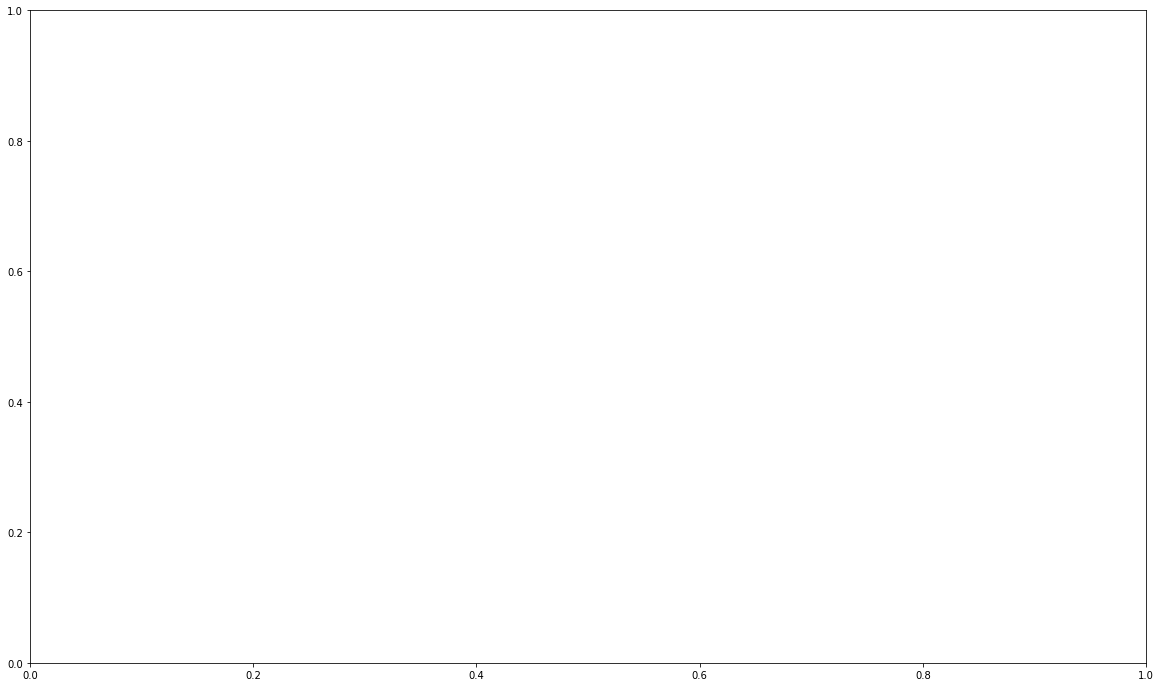

In [187]:
# GET F25 MSES
data_size = "250"

alphas = [".001"]
versions = ["1","2","3"]
it75 = range(0,17501,2500)
it75 = it75[1:]
loss = "combined_fs1_f25"
test_losses_f25 = [[],[],[]]
test_losses_dict_f25 = [[],[],[]]

for v,version in enumerate(versions):
    for a,alpha in enumerate(alphas):
        for i,it in enumerate(it75):
            print(it,"it")
            if it < 1000:
                it = "0000" + str(it)
            elif it > 9999:
                it = "00" + str(it)
            else:
                it = "000" + str(it)
            config_file = "/home/bsb2144/directpose/configs/fcos/fcos_kps_ms_training_R_50_FPN_1x.yaml"

            cfg.merge_from_file("/home/bsb2144/directpose/configs/fcos/fcos_kps_ms_training_R_50_FPN_1x.yaml")
            cfg.merge_from_list(['DATALOADER.NUM_WORKERS', '2', \
                                 'DATATYPE', 'bee', \
                                 'OUTPUT_DIR', 'training_dir/' + data_size + '/' + loss + '/'+ version + '/'+ alpha+'/fcos_kps_ms_training_R_50_FPN_1x_bee1', \
                                 'MODEL.WEIGHT', '/home/bsb2144/directpose/tools/training_dir/' + data_size + '/'+ loss +'/'+ version  +'/'+ alpha+'/fcos_kps_ms_training_R_50_FPN_1x_bee/model_' +it +'.pth',\
                                 'DATASETS.TEST', "('bee_val_cocostyle',)",\
                                 'DATASETS.TRAIN', "('bee_train_cocostyle', )",\
                                ])

            coco_demo = COCODemo(
                        cfg,
                        min_image_size=800,
                        confidence_threshold=0.2,
            )


            plt.figure(figsize = (20,12))

            mse_total = []
            for idx, image in enumerate(test_images):
                mse_per_bee = []
                predictions, tps, hm_res, stride, hms, targets, c_loss = coco_demo.run_on_opencv_image(image)
                kps = tps.get_field("keypoints").keypoints
                bboxes = tps.bbox
                plt.gca().invert_yaxis()
                #imshow(predictions[:, :, [2, 1, 0]])
                plt.gca().invert_yaxis()

                for p in data_an['images'][:]:
                    if (str(p['file_name']) == test_files[idx] ):
                        im_id = p['id']         
                print(im_id)
                for p in data_an['annotations'][:]:
                    if ((p['image_id']) == im_id ):
                        bb = p['bbox']
                        #bb = bb[0] #comment line for test
                        bb_f = [bb[:2], bb[2:4], bb[4:6], bb[6:]]
                        bbox = bounding_box(bb_f)
                        cent_val = get_centroid(bbox)
                        dists = []
                        #print(cent_val)
                        for index, p_bbox in enumerate(bboxes):
                            cp = get_centroid(p_bbox)
                            dist = get_dist(cent_val, cp)
                            dists.append(dist)
                            #print(dist)
                        min_idx = dists.index(min(dists))
                        #print("min id", min_idx)
                        kps_val = p["keypoints"]
                        kps_pred = kps[min_idx].tolist()
                        kps_pred_list = [kps_pred[0][:2],kps_pred[1][:2],kps_pred[2][:2],kps_pred[3][:2],kps_pred[4][:2]]
                        kps_pl = list(chain.from_iterable(kps_pred_list))
                        #print("kps val", kps_val)
                        #print("kp pred", kps_pl)
                        diff_vec = np.array(kps_val) - np.array(kps_pl)
                        #print(diff_vec)
                        #print(diff_vec*diff_vec)
                        diff_vec_sum_sq = np.sum(diff_vec*diff_vec)
                        #print(diff_vec_sum_sq)
                        mse_per_bee.append(diff_vec_sum_sq)

                mse_per_image = sum(mse_per_bee)
                mse_final = mse_per_image/len(mse_per_bee)
                mse_total.append(mse_final)

            mse_test = sum(mse_total)/len(mse_total)
            
                
            std_0_to_7500_dict[v].append({loss+'/'+version+'/'+alpha+'/'+it : mse_test})
            std_0_to_7500[v].append(mse_test)
            #print("mse "+loss, mse_test)

print(std_0_to_7500)
print(std_0_to_7500_dict)

In [ ]:
# GET F5 MSES
data_size = "250"

alphas = [".001"]
versions = ["1","2","3"]

it50 = range(0,15001,2500)
it50 = it50[1:]
loss = "combined_fs1_f5"

test_losses_f5 = [[],[],[]]
test_losses_dict_f5 = [[],[],[]]

for v,version in enumerate(versions):
    for a,alpha in enumerate(alphas):
        for i,it in enumerate(it50):
            print(it,"it")
            if it < 1000:
                it = "0000" + str(it)
            elif it > 9999:
                it = "00" + str(it)
            else:
                it = "000" + str(it)
            config_file = "/home/bsb2144/directpose/configs/fcos/fcos_kps_ms_training_R_50_FPN_1x.yaml"

            cfg.merge_from_file("/home/bsb2144/directpose/configs/fcos/fcos_kps_ms_training_R_50_FPN_1x.yaml")
            cfg.merge_from_list(['DATALOADER.NUM_WORKERS', '2', \
                                 'DATATYPE', 'bee', \
                                 'OUTPUT_DIR', 'training_dir/' + data_size + '/' + loss + '/'+ version + '/'+ alpha+'/fcos_kps_ms_training_R_50_FPN_1x_bee1', \
                                 'MODEL.WEIGHT', '/home/bsb2144/directpose/tools/training_dir/' + data_size + '/'+ loss +'/'+ version  +'/'+ alpha+'/fcos_kps_ms_training_R_50_FPN_1x_bee/model_' +it +'.pth',\
                                 'DATASETS.TEST', "('bee_val_cocostyle',)",\
                                 'DATASETS.TRAIN', "('bee_train_cocostyle', )",\
                                ])

            coco_demo = COCODemo(
                        cfg,
                        min_image_size=800,
                        confidence_threshold=0.2,
            )


            plt.figure(figsize = (20,12))

            mse_total = []
            for idx, image in enumerate(test_images):
                mse_per_bee = []
                predictions, tps, hm_res, stride, hms, targets, c_loss = coco_demo.run_on_opencv_image(image)
                kps = tps.get_field("keypoints").keypoints
                bboxes = tps.bbox
                plt.gca().invert_yaxis()
                #imshow(predictions[:, :, [2, 1, 0]])
                plt.gca().invert_yaxis()

                for p in data_an['images'][:]:
                    if (str(p['file_name']) == test_files[idx] ):
                        im_id = p['id']         
                print(im_id)
                for p in data_an['annotations'][:]:
                    if ((p['image_id']) == im_id ):
                        bb = p['bbox']
                        #bb = bb[0] #comment line for test
                        bb_f = [bb[:2], bb[2:4], bb[4:6], bb[6:]]
                        bbox = bounding_box(bb_f)
                        cent_val = get_centroid(bbox)
                        dists = []
                        #print(cent_val)
                        for index, p_bbox in enumerate(bboxes):
                            cp = get_centroid(p_bbox)
                            dist = get_dist(cent_val, cp)
                            dists.append(dist)
                            #print(dist)
                        min_idx = dists.index(min(dists))
                        #print("min id", min_idx)
                        kps_val = p["keypoints"]
                        kps_pred = kps[min_idx].tolist()
                        kps_pred_list = [kps_pred[0][:2],kps_pred[1][:2],kps_pred[2][:2],kps_pred[3][:2],kps_pred[4][:2]]
                        kps_pl = list(chain.from_iterable(kps_pred_list))
                        #print("kps val", kps_val)
                        #print("kp pred", kps_pl)
                        diff_vec = np.array(kps_val) - np.array(kps_pl)
                        #print(diff_vec)
                        #print(diff_vec*diff_vec)
                        diff_vec_sum_sq = np.sum(diff_vec*diff_vec)
                        #print(diff_vec_sum_sq)
                        mse_per_bee.append(diff_vec_sum_sq)

                mse_per_image = sum(mse_per_bee)
                mse_final = mse_per_image/len(mse_per_bee)
                mse_total.append(mse_final)

            mse_test = sum(mse_total)/len(mse_total)
            
                
            test_losses_dict_f5[v].append({loss+'/'+version+'/'+alpha+'/'+it : mse_test})
            test_losses_f5[v].append(mse_test)
            #print("mse "+loss, mse_test)

print(test_losses_dict_f5)
print(test_losses_f5)

In [170]:
print(test_losses_2)
print(test_losses_dict_2)

[[[7660.804133244662, 25422.373878136328, 26166.150524310102, 10969.486463852345, 49001.24773475411, 8692.88886218893, 7286.281761343337, 8987.751331380863, 8227.041746112414, 7534.482046838938, 7937.740974878295, 7947.694189155992, 11613.810075116606, 10132.883493400197, 8016.519726786312], [11016.265571112124, 23292.324586370938, 9379.733260558582, 11709.11485124178, 13139.171759947845, 8063.125205734469, 11728.602494270694, 8411.916560415975, 9716.280134703882, 7195.995303060991, 8805.349612122247, 7211.302967774818, 6433.156052997345, 9768.82325734212, 7066.557923935712], [44755.69933769669, 9289.055743807898, 10084.510815101492, 9836.877782674024, 8281.644147146686, 9031.23849898599, 11957.551743405405, 6777.299189308922, 7404.937457114289, 6566.815027372649, 7515.499225979698, 9561.795926309649, 8858.115210405955, 8497.970229918383, 9324.329535810244], [13436.085282788075, 15519.0760683229, 10480.951390522247, 9212.794544049499, 7066.497364137919, 7852.415743578897, 12018.3888121

In [87]:
print(test_losses)
print(test_losses_dict)

[[[7660.804133244662, 25422.373878136328, 26166.150524310102, 10969.486463852345, 49001.24773475411, 8692.88886218893, 7286.281761343337, 8987.751331380863, 8227.041746112414, 7534.482046838938, 7937.740974878295, 7947.694189155992, 11613.810075116606, 10132.883493400197, 8016.519726786312], [11016.265571112124, 23292.324586370938, 9379.733260558582, 11709.11485124178, 13139.171759947845, 8063.125205734469, 11728.602494270694, 8411.916560415975, 9716.280134703882, 7195.995303060991, 8805.349612122247, 7211.302967774818, 6433.156052997345, 9768.82325734212, 7066.557923935712], [44755.69933769669, 9289.055743807898, 10084.510815101492, 9836.877782674024, 8281.644147146686, 9031.23849898599, 11957.551743405405, 6777.299189308922, 7404.937457114289, 6566.815027372649, 7515.499225979698, 9561.795926309649, 8858.115210405955, 8497.970229918383, 9324.329535810244], [13436.085282788075, 15519.0760683229, 10480.951390522247, 9212.794544049499, 7066.497364137919, 7852.415743578897, 12018.3888121

In [88]:
#tsv1 = test_losses
#tsdv1 = test_losses_dict

In [94]:
#tsv2 = test_losses_2
#tsdv2 = test_losses_dict_2

In [151]:
avg_test = [[],[],[],[]]
it75 = range(0,7501,500)
it75=it75[1:]
alphas = [".0001",".001",".01",".1"]
for a, alpha in enumerate(alphas):
    for w, wn in enumerate(it75):
        print(a,alpha)
        print(w,wn)
        val = (test_losses_2[0][a][w] + test_losses_2[1][a][w] + test_losses_2[2][a][w])/3
        print(alpha,":",wn,":",val)
        print((test_losses_2[0][a][w], test_losses_2[1][a][w], test_losses_2[2][a][w]))
        avg_test[a].append(val)

0 .0001
0 500
.0001 : 500 : 9437.772218333295
(7660.804133244662, 10340.825054591614, 10311.687467163612)
0 .0001
1 1000
.0001 : 1000 : 31472.1008896983
(25422.373878136328, 12438.955229138384, 56554.9735618202)
0 .0001
2 1500
.0001 : 1500 : 15927.367908847045
(26166.150524310102, 9873.478470412083, 11742.474731818955)
0 .0001
3 2000
.0001 : 2000 : 18523.443066373806
(10969.486463852345, 9198.506903033547, 35402.33583223552)
0 .0001
4 2500
.0001 : 2500 : 22970.077130032485
(49001.24773475411, 8654.918392016136, 11254.0652633272)
0 .0001
5 3000
.0001 : 3000 : 10210.441845921287
(8692.88886218893, 11843.954945295496, 10094.481730279436)
0 .0001
6 3500
.0001 : 3500 : 9375.38571257903
(7286.281761343337, 9965.515114836511, 10874.360261557236)
0 .0001
7 4000
.0001 : 4000 : 9021.14718228479
(8987.751331380863, 7843.373609341552, 10232.316606131957)
0 .0001
8 4500
.0001 : 4500 : 8187.16262814217
(8227.041746112414, 9031.28653441743, 7303.159603896666)
0 .0001
9 5000
.0001 : 5000 : 7317.283405

19 15


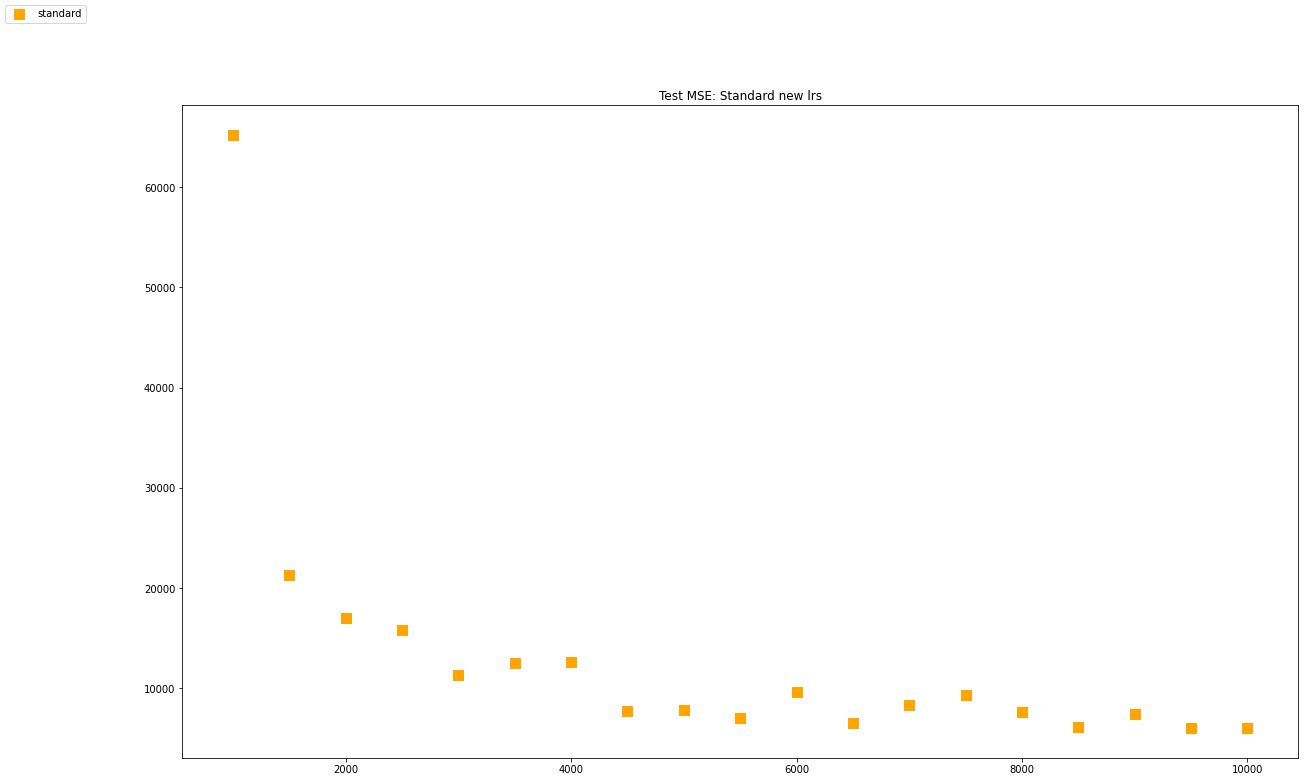

In [198]:
alphas = [".001"]#, ".001", ".01", ".1"]
it75 = range(0,10001,500)
it75=it75[2:]
fig, axes = plt.subplots(1,1)
ax = axes
ax.title.set_text("Test MSE: Standard new lrs")
titles = ["HM Loss combo from 2.5k: " + str(alphas[0]),"DP Loss combo from 2.5k: " + str(alphas[0]),"MSE train combo from 2.5k: " + str(alphas[0])]
#iters75 = range(0,7501,500)
colors = ['r','b','y','g']
for a, alpha in enumerate(alphas):
    color = colors[a]
    #for w in iters75:
        #titles = ["HM Loss combo from 2.5k: " + str(alphas[i])]
        #for idx, ax in enumerate(axes[i]):
        #ax.title.set_text(titles[idx])
    print(len(it75), len(avg_test[a]))
    #ax.scatter(it75, test_losses_2[1][a], s=15, c=color, marker="s", label=alpha)
        #ax.scatter(iters75,values[0][1], s=10, c='r', marker="o", label='V2')
        #ax.scatter(iters75,values[0][2], s=10, c='g', marker="o", label='V3')
ax.scatter(it75, std_all, s=85, c='orange', marker="s", label="standard")
    #plt.title("Heatmap Loss Std")
fig.legend(loc='upper left')
fig.savefig("combost_7.5k_test_mse" +'.png')
plt.show()

In [145]:
avg_test_f5 = [[],[],[],[]]
it50 = range(0,5001,500)
it50=it50[1:]
alphas = [".0001",".001",".01",".1"]
for a, alpha in enumerate(alphas):
    for w, wn in enumerate(it50):
        print(a,alpha)
        print(w,wn)
        val = (test_losses_f5[0][a][w] + test_losses_f5[1][a][w] + test_losses_f5[2][a][w])/3
        print(alpha,":",wn,":",val)
        print((test_losses_f5[0][a][w], test_losses_f5[1][a][w], test_losses_f5[2][a][w]))
        avg_test_f5[a].append(val)

0 .0001
0 500
.0001 : 500 : 7282.410999799766
(7422.8333510041175, 7239.50550937686, 7184.894139018319)
0 .0001
1 1000
.0001 : 1000 : 8556.91693812355
(8084.070769272433, 8906.245850556132, 8680.434194542086)
0 .0001
2 1500
.0001 : 1500 : 8374.381202866982
(7492.264952943091, 9183.042191785844, 8447.836463872012)
0 .0001
3 2000
.0001 : 2000 : 9402.355347981504
(8872.357966133195, 10426.529949739905, 8908.178128071413)
0 .0001
4 2500
.0001 : 2500 : 7800.499588805097
(7089.243909251684, 7607.7900526621825, 8704.464804501424)
0 .0001
5 3000
.0001 : 3000 : 9165.497558661627
(8338.019749920375, 9725.778147673514, 9432.69477839099)
0 .0001
6 3500
.0001 : 3500 : 8181.598201661065
(7967.486509477019, 6805.813138437677, 9771.494957068497)
0 .0001
7 4000
.0001 : 4000 : 7471.1202543333775
(7563.388828763444, 6902.9803884688945, 7946.9915457677935)
0 .0001
8 4500
.0001 : 4500 : 7497.361951275717
(8020.293211862184, 7650.019495448632, 6821.773146516336)
0 .0001
9 5000
.0001 : 5000 : 7727.3464656672

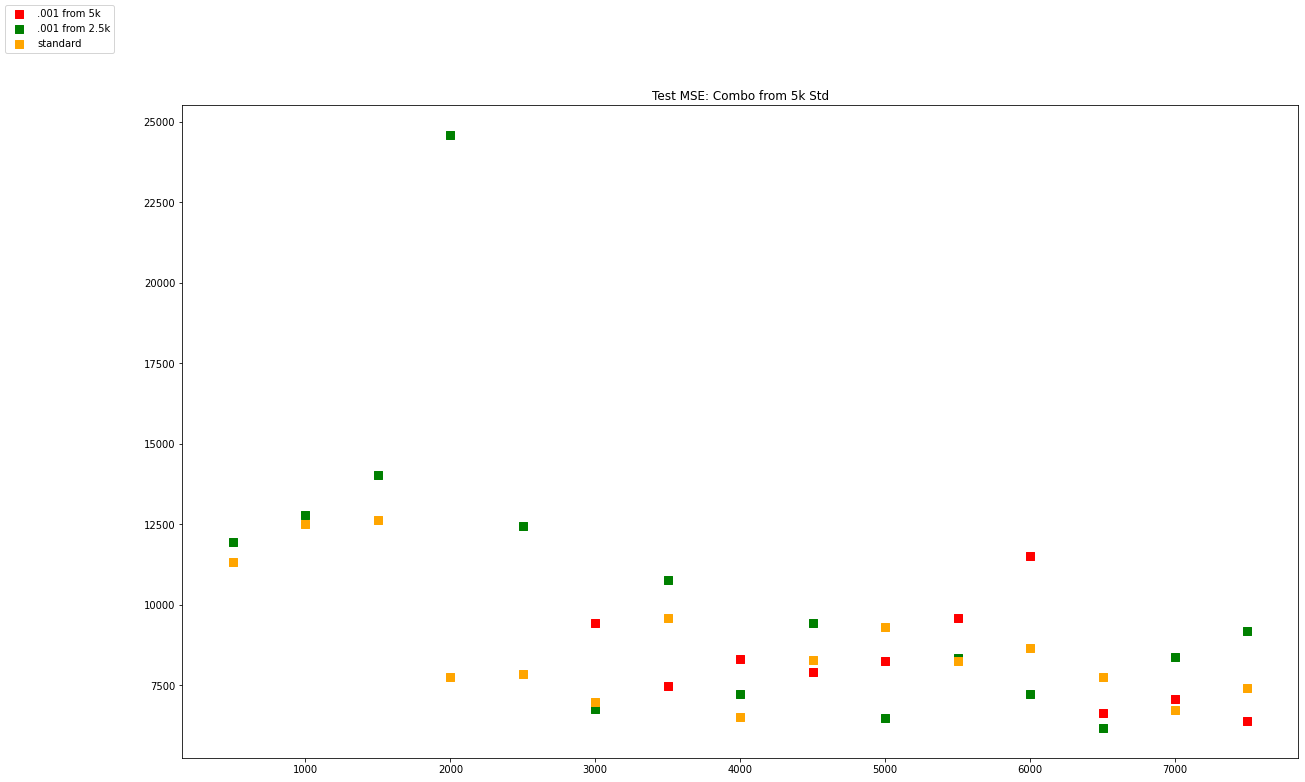

In [169]:
alphas = [".001"]#, ".001", ".01", ".1"]
it50 = range(2500,7501,500)
it50=it50[1:]
it75 = range(0,7501,500)
it75=it75[1:]
fig, axes = plt.subplots(1,1)
ax = axes
ax.title.set_text("Test MSE: Combo from 5k Std")
#titles = ["HM Loss combo from 5k: " + str(alphas[0]),"DP Loss combo from 2.5k: " + str(alphas[0]),"MSE train combo from 2.5k: " + str(alphas[0])]
#iters75 = range(0,7501,500)
colors = ['r','b','y','g']
for a, alpha in enumerate(alphas):
    color = colors[a]
    #for w in iters75:
        #titles = ["HM Loss combo from 2.5k: " + str(alphas[i])]
        #for idx, ax in enumerate(axes[i]):
        #ax.title.set_text(titles[idx])
        #print(len(it50), len(avg_test_f5[a]))
    #ax.errorbar(it75, test_losses_2[1][a], xerr=0, yerr=100,markersize=80,linestyle='dotted',color='green')
    ax.scatter(it50, test_losses_f5[1][1], s=55, c=color, marker="s", label=alpha+' from 5k')
    ax.scatter(it75, test_losses_2[1][1], s=55, c=colors[3], marker="s", label=alpha+' from 2.5k')
    #groups = [[] for i in range(max(X))][groups[X[i]-1].append(H[i]) for i in range(len(H))]
    #plt.boxplot(groups)
        #ax.scatter(iters75,values[0][1], s=10, c='r', marker="o", label='V2')
        #ax.scatter(iters75,values[0][2], s=10, c='g', marker="o", label='V3')
ax.scatter(it75, stdl, s=55, c='orange', marker="s", label="standard")
    #plt.title("Heatmap Loss Std")
fig.legend(loc='upper left')
fig.savefig("combost_5k_test_mse" +'.png')
plt.show()

In [ ]:
# graph box plots for alpha=.001
alphas = [".001"]

itf5 = range(0,15001,500)
itf5=itf5[1:]

itf25 = range(0,17501,500)
itf25=itf25[1:]

itstd = range(0,20001,500)
itstd=itstd[2:]

fig, axes = plt.subplots(1,1)
ax = axes
ax.title.set_text("Test MSE boxplot")

colors = ['r','b','y','g']
for a, alpha in enumerate(alphas):
    color = colors[a]
    
    ax.scatter(itf5, test_losses_f5[0], s=55, c=color, marker="s", label=alpha+' from 5k')
    ax.scatter(itf5, test_losses_f5[1], s=55, c=color, marker="s", label=alpha+' from 5k')
    ax.scatter(itf5, test_losses_f5[2], s=55, c=color, marker="s", label=alpha+' from 5k')
    
    ax.scatter(itf25, test_losses_f25[0], s=65, c=colors[3], marker="o", label=alpha+' from 2.5k')
    ax.scatter(itf25, test_losses_f25[1], s=65, c=colors[3], marker="o", label=alpha+' from 2.5k')
    ax.scatter(itf25, test_losses_f25[2], s=65, c=colors[3], marker="o", label=alpha+' from 2.5k')
    
        
ax.scatter(itstd, test_std, s=55, c='orange', marker="s", label="standard")

fig.legend(loc='upper left')
fig.savefig("all_20_.001" +'.png')
plt.show()

In [168]:
print(test_losses_2[0][1])
print(test_losses_2[1][1])
print(test_losses_2[2][1])

[11016.265571112124, 23292.324586370938, 9379.733260558582, 11709.11485124178, 13139.171759947845, 8063.125205734469, 11728.602494270694, 8411.916560415975, 9716.280134703882, 7195.995303060991, 8805.349612122247, 7211.302967774818, 6433.156052997345, 9768.82325734212, 7066.557923935712]
[11961.882991036631, 12803.73495878572, 14035.943354143765, 24581.382987848192, 12462.61281651698, 6755.4796022056835, 10774.66046274207, 7224.526754368183, 9438.073160622502, 6476.973051675778, 8344.140711685537, 7227.531765453928, 6174.237627501791, 8367.379520001072, 9205.091507681642]
[9514.601491774336, 12694.853100472817, 9021.711967264902, 8807.714865209382, 7981.778595982671, 9754.289877264015, 7605.090452078809, 9463.866340199726, 7554.8676207523, 9540.614879438339, 7985.164121127423, 8612.836626963526, 8865.934826158618, 8682.560790342757, 8394.857245550547]


In [ ]:
[[[7660.804133244662, 25422.373878136328, 26166.150524310102, 10969.486463852345, 49001.24773475411, 8692.88886218893, 7286.281761343337, 8987.751331380863, 8227.041746112414, 7534.482046838938, 7937.740974878295, 7947.694189155992, 11613.810075116606, 10132.883493400197, 8016.519726786312], [11016.265571112124, 23292.324586370938, 9379.733260558582, 11709.11485124178, 13139.171759947845, 8063.125205734469, 11728.602494270694, 8411.916560415975, 9716.280134703882, 7195.995303060991, 8805.349612122247, 7211.302967774818, 6433.156052997345, 9768.82325734212, 7066.557923935712], [44755.69933769669, 9289.055743807898, 10084.510815101492, 9836.877782674024, 8281.644147146686, 9031.23849898599, 11957.551743405405, 6777.299189308922, 7404.937457114289, 6566.815027372649, 7515.499225979698, 9561.795926309649, 8858.115210405955, 8497.970229918383, 9324.329535810244], [13436.085282788075, 15519.0760683229, 10480.951390522247, 9212.794544049499, 7066.497364137919, 7852.415743578897, 12018.388812149777, 8268.627106396461, 7135.458992995702, 8706.146363232267, 10019.298309323322, 8367.498122444607, 7888.1637310064525, 7086.96872740155, 7998.981131034931]], [[10340.825054591614, 12438.955229138384, 9873.478470412083, 9198.506903033547, 8654.918392016136, 11843.954945295496, 9965.515114836511, 7843.373609341552, 9031.28653441743, 6947.762638317583, 7577.162144911341, 9009.89773962826, 10104.415788222008, 8713.544154091906, 7005.229543569436], [11961.882991036631, 12803.73495878572, 14035.943354143765, 24581.382987848192, 12462.61281651698, 6755.4796022056835, 10774.66046274207, 7224.526754368183, 9438.073160622502], [], []], [[], [], [], []]]
[[[{'combined_fs1_f25/1/.0001/0000500': 7660.804133244662}, {'combined_fs1_f25/1/.0001/0001000': 25422.373878136328}, {'combined_fs1_f25/1/.0001/0001500': 26166.150524310102}, {'combined_fs1_f25/1/.0001/0002000': 10969.486463852345}, {'combined_fs1_f25/1/.0001/0002500': 49001.24773475411}, {'combined_fs1_f25/1/.0001/0003000': 8692.88886218893}, {'combined_fs1_f25/1/.0001/0003500': 7286.281761343337}, {'combined_fs1_f25/1/.0001/0004000': 8987.751331380863}, {'combined_fs1_f25/1/.0001/0004500': 8227.041746112414}, {'combined_fs1_f25/1/.0001/0005000': 7534.482046838938}, {'combined_fs1_f25/1/.0001/0005500': 7937.740974878295}, {'combined_fs1_f25/1/.0001/0006000': 7947.694189155992}, {'combined_fs1_f25/1/.0001/0006500': 11613.810075116606}, {'combined_fs1_f25/1/.0001/0007000': 10132.883493400197}, {'combined_fs1_f25/1/.0001/0007500': 8016.519726786312}], [{'combined_fs1_f25/1/.001/0000500': 11016.265571112124}, {'combined_fs1_f25/1/.001/0001000': 23292.324586370938}, {'combined_fs1_f25/1/.001/0001500': 9379.733260558582}, {'combined_fs1_f25/1/.001/0002000': 11709.11485124178}, {'combined_fs1_f25/1/.001/0002500': 13139.171759947845}, {'combined_fs1_f25/1/.001/0003000': 8063.125205734469}, {'combined_fs1_f25/1/.001/0003500': 11728.602494270694}, {'combined_fs1_f25/1/.001/0004000': 8411.916560415975}, {'combined_fs1_f25/1/.001/0004500': 9716.280134703882}, {'combined_fs1_f25/1/.001/0005000': 7195.995303060991}, {'combined_fs1_f25/1/.001/0005500': 8805.349612122247}, {'combined_fs1_f25/1/.001/0006000': 7211.302967774818}, {'combined_fs1_f25/1/.001/0006500': 6433.156052997345}, {'combined_fs1_f25/1/.001/0007000': 9768.82325734212}, {'combined_fs1_f25/1/.001/0007500': 7066.557923935712}], [{'combined_fs1_f25/1/.01/0000500': 44755.69933769669}, {'combined_fs1_f25/1/.01/0001000': 9289.055743807898}, {'combined_fs1_f25/1/.01/0001500': 10084.510815101492}, {'combined_fs1_f25/1/.01/0002000': 9836.877782674024}, {'combined_fs1_f25/1/.01/0002500': 8281.644147146686}, {'combined_fs1_f25/1/.01/0003000': 9031.23849898599}, {'combined_fs1_f25/1/.01/0003500': 11957.551743405405}, {'combined_fs1_f25/1/.01/0004000': 6777.299189308922}, {'combined_fs1_f25/1/.01/0004500': 7404.937457114289}, {'combined_fs1_f25/1/.01/0005000': 6566.815027372649}, {'combined_fs1_f25/1/.01/0005500': 7515.499225979698}, {'combined_fs1_f25/1/.01/0006000': 9561.795926309649}, {'combined_fs1_f25/1/.01/0006500': 8858.115210405955}, {'combined_fs1_f25/1/.01/0007000': 8497.970229918383}, {'combined_fs1_f25/1/.01/0007500': 9324.329535810244}], [{'combined_fs1_f25/1/.1/0000500': 13436.085282788075}, {'combined_fs1_f25/1/.1/0001000': 15519.0760683229}, {'combined_fs1_f25/1/.1/0001500': 10480.951390522247}, {'combined_fs1_f25/1/.1/0002000': 9212.794544049499}, {'combined_fs1_f25/1/.1/0002500': 7066.497364137919}, {'combined_fs1_f25/1/.1/0003000': 7852.415743578897}, {'combined_fs1_f25/1/.1/0003500': 12018.388812149777}, {'combined_fs1_f25/1/.1/0004000': 8268.627106396461}, {'combined_fs1_f25/1/.1/0004500': 7135.458992995702}, {'combined_fs1_f25/1/.1/0005000': 8706.146363232267}, {'combined_fs1_f25/1/.1/0005500': 10019.298309323322}, {'combined_fs1_f25/1/.1/0006000': 8367.498122444607}, {'combined_fs1_f25/1/.1/0006500': 7888.1637310064525}, {'combined_fs1_f25/1/.1/0007000': 7086.96872740155}, {'combined_fs1_f25/1/.1/0007500': 7998.981131034931}]], [[{'combined_fs1_f25/2/.0001/0000500': 10340.825054591614}, {'combined_fs1_f25/2/.0001/0001000': 12438.955229138384}, {'combined_fs1_f25/2/.0001/0001500': 9873.478470412083}, {'combined_fs1_f25/2/.0001/0002000': 9198.506903033547}, {'combined_fs1_f25/2/.0001/0002500': 8654.918392016136}, {'combined_fs1_f25/2/.0001/0003000': 11843.954945295496}, {'combined_fs1_f25/2/.0001/0003500': 9965.515114836511}, {'combined_fs1_f25/2/.0001/0004000': 7843.373609341552}, {'combined_fs1_f25/2/.0001/0004500': 9031.28653441743}, {'combined_fs1_f25/2/.0001/0005000': 6947.762638317583}, {'combined_fs1_f25/2/.0001/0005500': 7577.162144911341}, {'combined_fs1_f25/2/.0001/0006000': 9009.89773962826}, {'combined_fs1_f25/2/.0001/0006500': 10104.415788222008}, {'combined_fs1_f25/2/.0001/0007000': 8713.544154091906}, {'combined_fs1_f25/2/.0001/0007500': 7005.229543569436}], [{'combined_fs1_f25/2/.001/0000500': 11961.882991036631}, {'combined_fs1_f25/2/.001/0001000': 12803.73495878572}, {'combined_fs1_f25/2/.001/0001500': 14035.943354143765}, {'combined_fs1_f25/2/.001/0002000': 24581.382987848192}, {'combined_fs1_f25/2/.001/0002500': 12462.61281651698}, {'combined_fs1_f25/2/.001/0003000': 6755.4796022056835}, {'combined_fs1_f25/2/.001/0003500': 10774.66046274207}, {'combined_fs1_f25/2/.001/0004000': 7224.526754368183}, {'combined_fs1_f25/2/.001/0004500': 9438.073160622502}], [], []], [[], [], [], []]]

In [ ]:
[[[7660.804133244662, 25422.373878136328, 26166.150524310102, 10969.486463852345, 49001.24773475411, 8692.88886218893, 7286.281761343337, 8987.751331380863, 8227.041746112414, 7534.482046838938, 7937.740974878295, 7947.694189155992, 11613.810075116606, 10132.883493400197, 8016.519726786312], [11016.265571112124, 23292.324586370938, 9379.733260558582, 11709.11485124178, 13139.171759947845, 8063.125205734469, 11728.602494270694, 8411.916560415975, 9716.280134703882, 7195.995303060991, 8805.349612122247, 7211.302967774818, 6433.156052997345, 9768.82325734212, 7066.557923935712], [44755.69933769669, 9289.055743807898, 10084.510815101492, 9836.877782674024, 8281.644147146686, 9031.23849898599, 11957.551743405405, 6777.299189308922, 7404.937457114289, 6566.815027372649, 7515.499225979698, 9561.795926309649, 8858.115210405955, 8497.970229918383, 9324.329535810244], [13436.085282788075, 15519.0760683229, 10480.951390522247, 9212.794544049499, 7066.497364137919, 7852.415743578897, 12018.388812149777, 8268.627106396461, 7135.458992995702, 8706.146363232267, 10019.298309323322, 8367.498122444607, 7888.1637310064525, 7086.96872740155, 7998.981131034931]], [[10340.825054591614, 12438.955229138384, 9873.478470412083, 9198.506903033547, 8654.918392016136, 11843.954945295496, 9965.515114836511, 7843.373609341552, 9031.28653441743, 6947.762638317583, 7577.162144911341, 9009.89773962826, 10104.415788222008, 8713.544154091906, 7005.229543569436], [11961.882991036631, 12803.73495878572, 14035.943354143765, 24581.382987848192, 12462.61281651698, 6755.4796022056835, 10774.66046274207, 7224.526754368183, 9438.073160622502, 6476.973051675778, 8344.140711685537, 7227.531765453928, 6174.237627501791, 8367.379520001072, 9205.091507681642], [31653.06880943638, 10442.793387781256, 11369.472334460535, 10039.378881313743, 7100.842545315755, 9387.848022725779, 8750.23116234488, 13642.167461716544, 7273.541663252429, 8959.671938245014, 8372.81973368304, 7760.442229747565, 7867.732698301241, 7864.614760618574, 11691.48425173546], [12476.85657393134, 13369.19478156983, 11718.971511489826, 13052.020414395653, 13258.715533444747, 11351.715462685197, 8579.45619004513, 9672.60026369701, 9432.795138386662, 9517.856479003582, 9929.751331223199, 7729.51371802294, 6603.721719552073, 6387.766475548546, 8373.336386386543]], [[10311.687467163612, 56554.9735618202, 11742.474731818955, 35402.33583223552, 11254.0652633272, 10094.481730279436, 10874.360261557236, 10232.316606131957, 7303.159603896666, 7469.60553212165, 7046.406032295897, 10131.56118162312, 6863.791502863974, 9381.95553834088, 15978.953618962658], [9514.601491774336, 12694.853100472817, 9021.711967264902, 8807.714865209382, 7981.778595982671, 9754.289877264015, 7605.090452078809, 9463.866340199726, 7554.8676207523, 9540.614879438339, 7985.164121127423, 8612.836626963526, 8865.934826158618, 8682.560790342757, 8394.857245550547], [8310.477814969543, 13845.492074997723, 8565.246712353994, 10945.548160601315, 10670.776419395112, 8463.929225459411, 10608.341781249288, 9560.34576848423, 10298.635322666823, 7655.4512843601315], []]]
[[[{'combined_fs1_f25/1/.0001/0000500': 7660.804133244662}, {'combined_fs1_f25/1/.0001/0001000': 25422.373878136328}, {'combined_fs1_f25/1/.0001/0001500': 26166.150524310102}, {'combined_fs1_f25/1/.0001/0002000': 10969.486463852345}, {'combined_fs1_f25/1/.0001/0002500': 49001.24773475411}, {'combined_fs1_f25/1/.0001/0003000': 8692.88886218893}, {'combined_fs1_f25/1/.0001/0003500': 7286.281761343337}, {'combined_fs1_f25/1/.0001/0004000': 8987.751331380863}, {'combined_fs1_f25/1/.0001/0004500': 8227.041746112414}, {'combined_fs1_f25/1/.0001/0005000': 7534.482046838938}, {'combined_fs1_f25/1/.0001/0005500': 7937.740974878295}, {'combined_fs1_f25/1/.0001/0006000': 7947.694189155992}, {'combined_fs1_f25/1/.0001/0006500': 11613.810075116606}, {'combined_fs1_f25/1/.0001/0007000': 10132.883493400197}, {'combined_fs1_f25/1/.0001/0007500': 8016.519726786312}], [{'combined_fs1_f25/1/.001/0000500': 11016.265571112124}, {'combined_fs1_f25/1/.001/0001000': 23292.324586370938}, {'combined_fs1_f25/1/.001/0001500': 9379.733260558582}, {'combined_fs1_f25/1/.001/0002000': 11709.11485124178}, {'combined_fs1_f25/1/.001/0002500': 13139.171759947845}, {'combined_fs1_f25/1/.001/0003000': 8063.125205734469}, {'combined_fs1_f25/1/.001/0003500': 11728.602494270694}, {'combined_fs1_f25/1/.001/0004000': 8411.916560415975}, {'combined_fs1_f25/1/.001/0004500': 9716.280134703882}, {'combined_fs1_f25/1/.001/0005000': 7195.995303060991}, {'combined_fs1_f25/1/.001/0005500': 8805.349612122247}, {'combined_fs1_f25/1/.001/0006000': 7211.302967774818}, {'combined_fs1_f25/1/.001/0006500': 6433.156052997345}, {'combined_fs1_f25/1/.001/0007000': 9768.82325734212}, {'combined_fs1_f25/1/.001/0007500': 7066.557923935712}], [{'combined_fs1_f25/1/.01/0000500': 44755.69933769669}, {'combined_fs1_f25/1/.01/0001000': 9289.055743807898}, {'combined_fs1_f25/1/.01/0001500': 10084.510815101492}, {'combined_fs1_f25/1/.01/0002000': 9836.877782674024}, {'combined_fs1_f25/1/.01/0002500': 8281.644147146686}, {'combined_fs1_f25/1/.01/0003000': 9031.23849898599}, {'combined_fs1_f25/1/.01/0003500': 11957.551743405405}, {'combined_fs1_f25/1/.01/0004000': 6777.299189308922}, {'combined_fs1_f25/1/.01/0004500': 7404.937457114289}, {'combined_fs1_f25/1/.01/0005000': 6566.815027372649}, {'combined_fs1_f25/1/.01/0005500': 7515.499225979698}, {'combined_fs1_f25/1/.01/0006000': 9561.795926309649}, {'combined_fs1_f25/1/.01/0006500': 8858.115210405955}, {'combined_fs1_f25/1/.01/0007000': 8497.970229918383}, {'combined_fs1_f25/1/.01/0007500': 9324.329535810244}], [{'combined_fs1_f25/1/.1/0000500': 13436.085282788075}, {'combined_fs1_f25/1/.1/0001000': 15519.0760683229}, {'combined_fs1_f25/1/.1/0001500': 10480.951390522247}, {'combined_fs1_f25/1/.1/0002000': 9212.794544049499}, {'combined_fs1_f25/1/.1/0002500': 7066.497364137919}, {'combined_fs1_f25/1/.1/0003000': 7852.415743578897}, {'combined_fs1_f25/1/.1/0003500': 12018.388812149777}, {'combined_fs1_f25/1/.1/0004000': 8268.627106396461}, {'combined_fs1_f25/1/.1/0004500': 7135.458992995702}, {'combined_fs1_f25/1/.1/0005000': 8706.146363232267}, {'combined_fs1_f25/1/.1/0005500': 10019.298309323322}, {'combined_fs1_f25/1/.1/0006000': 8367.498122444607}, {'combined_fs1_f25/1/.1/0006500': 7888.1637310064525}, {'combined_fs1_f25/1/.1/0007000': 7086.96872740155}, {'combined_fs1_f25/1/.1/0007500': 7998.981131034931}]], [[{'combined_fs1_f25/2/.0001/0000500': 10340.825054591614}, {'combined_fs1_f25/2/.0001/0001000': 12438.955229138384}, {'combined_fs1_f25/2/.0001/0001500': 9873.478470412083}, {'combined_fs1_f25/2/.0001/0002000': 9198.506903033547}, {'combined_fs1_f25/2/.0001/0002500': 8654.918392016136}, {'combined_fs1_f25/2/.0001/0003000': 11843.954945295496}, {'combined_fs1_f25/2/.0001/0003500': 9965.515114836511}, {'combined_fs1_f25/2/.0001/0004000': 7843.373609341552}, {'combined_fs1_f25/2/.0001/0004500': 9031.28653441743}, {'combined_fs1_f25/2/.0001/0005000': 6947.762638317583}, {'combined_fs1_f25/2/.0001/0005500': 7577.162144911341}, {'combined_fs1_f25/2/.0001/0006000': 9009.89773962826}, {'combined_fs1_f25/2/.0001/0006500': 10104.415788222008}, {'combined_fs1_f25/2/.0001/0007000': 8713.544154091906}, {'combined_fs1_f25/2/.0001/0007500': 7005.229543569436}], [{'combined_fs1_f25/2/.001/0000500': 11961.882991036631}, {'combined_fs1_f25/2/.001/0001000': 12803.73495878572}, {'combined_fs1_f25/2/.001/0001500': 14035.943354143765}, {'combined_fs1_f25/2/.001/0002000': 24581.382987848192}, {'combined_fs1_f25/2/.001/0002500': 12462.61281651698}, {'combined_fs1_f25/2/.001/0003000': 6755.4796022056835}, {'combined_fs1_f25/2/.001/0003500': 10774.66046274207}, {'combined_fs1_f25/2/.001/0004000': 7224.526754368183}, {'combined_fs1_f25/2/.001/0004500': 9438.073160622502}, {'combined_fs1_f25/2/.001/0005000': 6476.973051675778}, {'combined_fs1_f25/2/.001/0005500': 8344.140711685537}, {'combined_fs1_f25/2/.001/0006000': 7227.531765453928}, {'combined_fs1_f25/2/.001/0006500': 6174.237627501791}, {'combined_fs1_f25/2/.001/0007000': 8367.379520001072}, {'combined_fs1_f25/2/.001/0007500': 9205.091507681642}], [{'combined_fs1_f25/2/.01/0000500': 31653.06880943638}, {'combined_fs1_f25/2/.01/0001000': 10442.793387781256}, {'combined_fs1_f25/2/.01/0001500': 11369.472334460535}, {'combined_fs1_f25/2/.01/0002000': 10039.378881313743}, {'combined_fs1_f25/2/.01/0002500': 7100.842545315755}, {'combined_fs1_f25/2/.01/0003000': 9387.848022725779}, {'combined_fs1_f25/2/.01/0003500': 8750.23116234488}, {'combined_fs1_f25/2/.01/0004000': 13642.167461716544}, {'combined_fs1_f25/2/.01/0004500': 7273.541663252429}, {'combined_fs1_f25/2/.01/0005000': 8959.671938245014}, {'combined_fs1_f25/2/.01/0005500': 8372.81973368304}, {'combined_fs1_f25/2/.01/0006000': 7760.442229747565}, {'combined_fs1_f25/2/.01/0006500': 7867.732698301241}, {'combined_fs1_f25/2/.01/0007000': 7864.614760618574}, {'combined_fs1_f25/2/.01/0007500': 11691.48425173546}], [{'combined_fs1_f25/2/.1/0000500': 12476.85657393134}, {'combined_fs1_f25/2/.1/0001000': 13369.19478156983}, {'combined_fs1_f25/2/.1/0001500': 11718.971511489826}, {'combined_fs1_f25/2/.1/0002000': 13052.020414395653}, {'combined_fs1_f25/2/.1/0002500': 13258.715533444747}, {'combined_fs1_f25/2/.1/0003000': 11351.715462685197}, {'combined_fs1_f25/2/.1/0003500': 8579.45619004513}, {'combined_fs1_f25/2/.1/0004000': 9672.60026369701}, {'combined_fs1_f25/2/.1/0004500': 9432.795138386662}, {'combined_fs1_f25/2/.1/0005000': 9517.856479003582}, {'combined_fs1_f25/2/.1/0005500': 9929.751331223199}, {'combined_fs1_f25/2/.1/0006000': 7729.51371802294}, {'combined_fs1_f25/2/.1/0006500': 6603.721719552073}, {'combined_fs1_f25/2/.1/0007000': 6387.766475548546}, {'combined_fs1_f25/2/.1/0007500': 8373.336386386543}]], [[{'combined_fs1_f25/3/.0001/0000500': 10311.687467163612}, {'combined_fs1_f25/3/.0001/0001000': 56554.9735618202}, {'combined_fs1_f25/3/.0001/0001500': 11742.474731818955}, {'combined_fs1_f25/3/.0001/0002000': 35402.33583223552}, {'combined_fs1_f25/3/.0001/0002500': 11254.0652633272}, {'combined_fs1_f25/3/.0001/0003000': 10094.481730279436}, {'combined_fs1_f25/3/.0001/0003500': 10874.360261557236}, {'combined_fs1_f25/3/.0001/0004000': 10232.316606131957}, {'combined_fs1_f25/3/.0001/0004500': 7303.159603896666}, {'combined_fs1_f25/3/.0001/0005000': 7469.60553212165}, {'combined_fs1_f25/3/.0001/0005500': 7046.406032295897}, {'combined_fs1_f25/3/.0001/0006000': 10131.56118162312}, {'combined_fs1_f25/3/.0001/0006500': 6863.791502863974}, {'combined_fs1_f25/3/.0001/0007000': 9381.95553834088}, {'combined_fs1_f25/3/.0001/0007500': 15978.953618962658}], [{'combined_fs1_f25/3/.001/0000500': 9514.601491774336}, {'combined_fs1_f25/3/.001/0001000': 12694.853100472817}, {'combined_fs1_f25/3/.001/0001500': 9021.711967264902}, {'combined_fs1_f25/3/.001/0002000': 8807.714865209382}, {'combined_fs1_f25/3/.001/0002500': 7981.778595982671}, {'combined_fs1_f25/3/.001/0003000': 9754.289877264015}, {'combined_fs1_f25/3/.001/0003500': 7605.090452078809}, {'combined_fs1_f25/3/.001/0004000': 9463.866340199726}, {'combined_fs1_f25/3/.001/0004500': 7554.8676207523}, {'combined_fs1_f25/3/.001/0005000': 9540.614879438339}, {'combined_fs1_f25/3/.001/0005500': 7985.164121127423}, {'combined_fs1_f25/3/.001/0006000': 8612.836626963526}, {'combined_fs1_f25/3/.001/0006500': 8865.934826158618}, {'combined_fs1_f25/3/.001/0007000': 8682.560790342757}, {'combined_fs1_f25/3/.001/0007500': 8394.857245550547}], [{'combined_fs1_f25/3/.01/0000500': 8310.477814969543}, {'combined_fs1_f25/3/.01/0001000': 13845.492074997723}, {'combined_fs1_f25/3/.01/0001500': 8565.246712353994}, {'combined_fs1_f25/3/.01/0002000': 10945.548160601315}, {'combined_fs1_f25/3/.01/0002500': 10670.776419395112}, {'combined_fs1_f25/3/.01/0003000': 8463.929225459411}, {'combined_fs1_f25/3/.01/0003500': 10608.341781249288}, {'combined_fs1_f25/3/.01/0004000': 9560.34576848423}, {'combined_fs1_f25/3/.01/0004500': 10298.635322666823}, {'combined_fs1_f25/3/.01/0005000': 7655.4512843601315}], []]]

In [ ]:
[[[7660.804133244662, 25422.373878136328, 26166.150524310102, 10969.486463852345, 49001.24773475411, 8692.88886218893, 7286.281761343337, 8987.751331380863, 8227.041746112414, 7534.482046838938, 7937.740974878295, 7947.694189155992, 11613.810075116606, 10132.883493400197, 8016.519726786312], [11016.265571112124, 23292.324586370938, 9379.733260558582, 11709.11485124178, 13139.171759947845, 8063.125205734469, 11728.602494270694, 8411.916560415975, 9716.280134703882, 7195.995303060991, 8805.349612122247, 7211.302967774818, 6433.156052997345, 9768.82325734212, 7066.557923935712], [44755.69933769669, 9289.055743807898, 10084.510815101492, 9836.877782674024, 8281.644147146686, 9031.23849898599, 11957.551743405405, 6777.299189308922, 7404.937457114289, 6566.815027372649, 7515.499225979698, 9561.795926309649, 8858.115210405955, 8497.970229918383, 9324.329535810244], [13436.085282788075, 15519.0760683229, 10480.951390522247, 9212.794544049499, 7066.497364137919, 7852.415743578897, 12018.388812149777, 8268.627106396461, 7135.458992995702, 8706.146363232267, 10019.298309323322, 8367.498122444607, 7888.1637310064525, 7086.96872740155, 7998.981131034931]], [[10340.825054591614, 12438.955229138384, 9873.478470412083, 9198.506903033547, 8654.918392016136, 11843.954945295496, 9965.515114836511, 7843.373609341552, 9031.28653441743, 6947.762638317583, 7577.162144911341, 9009.89773962826, 10104.415788222008, 8713.544154091906, 7005.229543569436], [11961.882991036631, 12803.73495878572, 14035.943354143765, 24581.382987848192, 12462.61281651698, 6755.4796022056835, 10774.66046274207, 7224.526754368183, 9438.073160622502, 6476.973051675778, 8344.140711685537, 7227.531765453928, 6174.237627501791, 8367.379520001072, 9205.091507681642], [31653.06880943638, 10442.793387781256, 11369.472334460535, 10039.378881313743, 7100.842545315755, 9387.848022725779, 8750.23116234488, 13642.167461716544, 7273.541663252429, 8959.671938245014, 8372.81973368304, 7760.442229747565, 7867.732698301241, 7864.614760618574, 11691.48425173546], [12476.85657393134, 13369.19478156983, 11718.971511489826, 13052.020414395653, 13258.715533444747, 11351.715462685197, 8579.45619004513, 9672.60026369701, 9432.795138386662, 9517.856479003582, 9929.751331223199, 7729.51371802294, 6603.721719552073, 6387.766475548546, 8373.336386386543]], [[10311.687467163612, 56554.9735618202, 11742.474731818955, 35402.33583223552, 11254.0652633272, 10094.481730279436, 10874.360261557236, 10232.316606131957, 7303.159603896666, 7469.60553212165, 7046.406032295897, 10131.56118162312, 6863.791502863974, 9381.95553834088, 15978.953618962658], [9514.601491774336, 12694.853100472817, 9021.711967264902, 8807.714865209382, 7981.778595982671, 9754.289877264015, 7605.090452078809, 9463.866340199726, 7554.8676207523, 9540.614879438339, 7985.164121127423, 8612.836626963526, 8865.934826158618, 8682.560790342757, 8394.857245550547], [8310.477814969543, 13845.492074997723, 8565.246712353994, 10945.548160601315, 10670.776419395112, 8463.929225459411, 10608.341781249288, 9560.34576848423, 10298.635322666823, 7655.4512843601315, 10795.830283689163, 8041.021509921614, 10013.938006026883, 6753.521215845841, 6993.860662073756], [10016.108658605104, 8725.40133739534, 9893.4299709671, 17668.31403789617, 9376.18687719852, 9342.98816692258, 8166.003314961971, 10463.705181682517, 10998.117906040587, 8054.195583394726, 10202.555327004617, 7957.1013864056695, 7811.371069803589, 8238.10777744732, 8569.688139289192]]]
[[[{'combined_fs1_f25/1/.0001/0000500': 7660.804133244662}, {'combined_fs1_f25/1/.0001/0001000': 25422.373878136328}, {'combined_fs1_f25/1/.0001/0001500': 26166.150524310102}, {'combined_fs1_f25/1/.0001/0002000': 10969.486463852345}, {'combined_fs1_f25/1/.0001/0002500': 49001.24773475411}, {'combined_fs1_f25/1/.0001/0003000': 8692.88886218893}, {'combined_fs1_f25/1/.0001/0003500': 7286.281761343337}, {'combined_fs1_f25/1/.0001/0004000': 8987.751331380863}, {'combined_fs1_f25/1/.0001/0004500': 8227.041746112414}, {'combined_fs1_f25/1/.0001/0005000': 7534.482046838938}, {'combined_fs1_f25/1/.0001/0005500': 7937.740974878295}, {'combined_fs1_f25/1/.0001/0006000': 7947.694189155992}, {'combined_fs1_f25/1/.0001/0006500': 11613.810075116606}, {'combined_fs1_f25/1/.0001/0007000': 10132.883493400197}, {'combined_fs1_f25/1/.0001/0007500': 8016.519726786312}], [{'combined_fs1_f25/1/.001/0000500': 11016.265571112124}, {'combined_fs1_f25/1/.001/0001000': 23292.324586370938}, {'combined_fs1_f25/1/.001/0001500': 9379.733260558582}, {'combined_fs1_f25/1/.001/0002000': 11709.11485124178}, {'combined_fs1_f25/1/.001/0002500': 13139.171759947845}, {'combined_fs1_f25/1/.001/0003000': 8063.125205734469}, {'combined_fs1_f25/1/.001/0003500': 11728.602494270694}, {'combined_fs1_f25/1/.001/0004000': 8411.916560415975}, {'combined_fs1_f25/1/.001/0004500': 9716.280134703882}, {'combined_fs1_f25/1/.001/0005000': 7195.995303060991}, {'combined_fs1_f25/1/.001/0005500': 8805.349612122247}, {'combined_fs1_f25/1/.001/0006000': 7211.302967774818}, {'combined_fs1_f25/1/.001/0006500': 6433.156052997345}, {'combined_fs1_f25/1/.001/0007000': 9768.82325734212}, {'combined_fs1_f25/1/.001/0007500': 7066.557923935712}], [{'combined_fs1_f25/1/.01/0000500': 44755.69933769669}, {'combined_fs1_f25/1/.01/0001000': 9289.055743807898}, {'combined_fs1_f25/1/.01/0001500': 10084.510815101492}, {'combined_fs1_f25/1/.01/0002000': 9836.877782674024}, {'combined_fs1_f25/1/.01/0002500': 8281.644147146686}, {'combined_fs1_f25/1/.01/0003000': 9031.23849898599}, {'combined_fs1_f25/1/.01/0003500': 11957.551743405405}, {'combined_fs1_f25/1/.01/0004000': 6777.299189308922}, {'combined_fs1_f25/1/.01/0004500': 7404.937457114289}, {'combined_fs1_f25/1/.01/0005000': 6566.815027372649}, {'combined_fs1_f25/1/.01/0005500': 7515.499225979698}, {'combined_fs1_f25/1/.01/0006000': 9561.795926309649}, {'combined_fs1_f25/1/.01/0006500': 8858.115210405955}, {'combined_fs1_f25/1/.01/0007000': 8497.970229918383}, {'combined_fs1_f25/1/.01/0007500': 9324.329535810244}], [{'combined_fs1_f25/1/.1/0000500': 13436.085282788075}, {'combined_fs1_f25/1/.1/0001000': 15519.0760683229}, {'combined_fs1_f25/1/.1/0001500': 10480.951390522247}, {'combined_fs1_f25/1/.1/0002000': 9212.794544049499}, {'combined_fs1_f25/1/.1/0002500': 7066.497364137919}, {'combined_fs1_f25/1/.1/0003000': 7852.415743578897}, {'combined_fs1_f25/1/.1/0003500': 12018.388812149777}, {'combined_fs1_f25/1/.1/0004000': 8268.627106396461}, {'combined_fs1_f25/1/.1/0004500': 7135.458992995702}, {'combined_fs1_f25/1/.1/0005000': 8706.146363232267}, {'combined_fs1_f25/1/.1/0005500': 10019.298309323322}, {'combined_fs1_f25/1/.1/0006000': 8367.498122444607}, {'combined_fs1_f25/1/.1/0006500': 7888.1637310064525}, {'combined_fs1_f25/1/.1/0007000': 7086.96872740155}, {'combined_fs1_f25/1/.1/0007500': 7998.981131034931}]], [[{'combined_fs1_f25/2/.0001/0000500': 10340.825054591614}, {'combined_fs1_f25/2/.0001/0001000': 12438.955229138384}, {'combined_fs1_f25/2/.0001/0001500': 9873.478470412083}, {'combined_fs1_f25/2/.0001/0002000': 9198.506903033547}, {'combined_fs1_f25/2/.0001/0002500': 8654.918392016136}, {'combined_fs1_f25/2/.0001/0003000': 11843.954945295496}, {'combined_fs1_f25/2/.0001/0003500': 9965.515114836511}, {'combined_fs1_f25/2/.0001/0004000': 7843.373609341552}, {'combined_fs1_f25/2/.0001/0004500': 9031.28653441743}, {'combined_fs1_f25/2/.0001/0005000': 6947.762638317583}, {'combined_fs1_f25/2/.0001/0005500': 7577.162144911341}, {'combined_fs1_f25/2/.0001/0006000': 9009.89773962826}, {'combined_fs1_f25/2/.0001/0006500': 10104.415788222008}, {'combined_fs1_f25/2/.0001/0007000': 8713.544154091906}, {'combined_fs1_f25/2/.0001/0007500': 7005.229543569436}], [{'combined_fs1_f25/2/.001/0000500': 11961.882991036631}, {'combined_fs1_f25/2/.001/0001000': 12803.73495878572}, {'combined_fs1_f25/2/.001/0001500': 14035.943354143765}, {'combined_fs1_f25/2/.001/0002000': 24581.382987848192}, {'combined_fs1_f25/2/.001/0002500': 12462.61281651698}, {'combined_fs1_f25/2/.001/0003000': 6755.4796022056835}, {'combined_fs1_f25/2/.001/0003500': 10774.66046274207}, {'combined_fs1_f25/2/.001/0004000': 7224.526754368183}, {'combined_fs1_f25/2/.001/0004500': 9438.073160622502}, {'combined_fs1_f25/2/.001/0005000': 6476.973051675778}, {'combined_fs1_f25/2/.001/0005500': 8344.140711685537}, {'combined_fs1_f25/2/.001/0006000': 7227.531765453928}, {'combined_fs1_f25/2/.001/0006500': 6174.237627501791}, {'combined_fs1_f25/2/.001/0007000': 8367.379520001072}, {'combined_fs1_f25/2/.001/0007500': 9205.091507681642}], [{'combined_fs1_f25/2/.01/0000500': 31653.06880943638}, {'combined_fs1_f25/2/.01/0001000': 10442.793387781256}, {'combined_fs1_f25/2/.01/0001500': 11369.472334460535}, {'combined_fs1_f25/2/.01/0002000': 10039.378881313743}, {'combined_fs1_f25/2/.01/0002500': 7100.842545315755}, {'combined_fs1_f25/2/.01/0003000': 9387.848022725779}, {'combined_fs1_f25/2/.01/0003500': 8750.23116234488}, {'combined_fs1_f25/2/.01/0004000': 13642.167461716544}, {'combined_fs1_f25/2/.01/0004500': 7273.541663252429}, {'combined_fs1_f25/2/.01/0005000': 8959.671938245014}, {'combined_fs1_f25/2/.01/0005500': 8372.81973368304}, {'combined_fs1_f25/2/.01/0006000': 7760.442229747565}, {'combined_fs1_f25/2/.01/0006500': 7867.732698301241}, {'combined_fs1_f25/2/.01/0007000': 7864.614760618574}, {'combined_fs1_f25/2/.01/0007500': 11691.48425173546}], [{'combined_fs1_f25/2/.1/0000500': 12476.85657393134}, {'combined_fs1_f25/2/.1/0001000': 13369.19478156983}, {'combined_fs1_f25/2/.1/0001500': 11718.971511489826}, {'combined_fs1_f25/2/.1/0002000': 13052.020414395653}, {'combined_fs1_f25/2/.1/0002500': 13258.715533444747}, {'combined_fs1_f25/2/.1/0003000': 11351.715462685197}, {'combined_fs1_f25/2/.1/0003500': 8579.45619004513}, {'combined_fs1_f25/2/.1/0004000': 9672.60026369701}, {'combined_fs1_f25/2/.1/0004500': 9432.795138386662}, {'combined_fs1_f25/2/.1/0005000': 9517.856479003582}, {'combined_fs1_f25/2/.1/0005500': 9929.751331223199}, {'combined_fs1_f25/2/.1/0006000': 7729.51371802294}, {'combined_fs1_f25/2/.1/0006500': 6603.721719552073}, {'combined_fs1_f25/2/.1/0007000': 6387.766475548546}, {'combined_fs1_f25/2/.1/0007500': 8373.336386386543}]], [[{'combined_fs1_f25/3/.0001/0000500': 10311.687467163612}, {'combined_fs1_f25/3/.0001/0001000': 56554.9735618202}, {'combined_fs1_f25/3/.0001/0001500': 11742.474731818955}, {'combined_fs1_f25/3/.0001/0002000': 35402.33583223552}, {'combined_fs1_f25/3/.0001/0002500': 11254.0652633272}, {'combined_fs1_f25/3/.0001/0003000': 10094.481730279436}, {'combined_fs1_f25/3/.0001/0003500': 10874.360261557236}, {'combined_fs1_f25/3/.0001/0004000': 10232.316606131957}, {'combined_fs1_f25/3/.0001/0004500': 7303.159603896666}, {'combined_fs1_f25/3/.0001/0005000': 7469.60553212165}, {'combined_fs1_f25/3/.0001/0005500': 7046.406032295897}, {'combined_fs1_f25/3/.0001/0006000': 10131.56118162312}, {'combined_fs1_f25/3/.0001/0006500': 6863.791502863974}, {'combined_fs1_f25/3/.0001/0007000': 9381.95553834088}, {'combined_fs1_f25/3/.0001/0007500': 15978.953618962658}], [{'combined_fs1_f25/3/.001/0000500': 9514.601491774336}, {'combined_fs1_f25/3/.001/0001000': 12694.853100472817}, {'combined_fs1_f25/3/.001/0001500': 9021.711967264902}, {'combined_fs1_f25/3/.001/0002000': 8807.714865209382}, {'combined_fs1_f25/3/.001/0002500': 7981.778595982671}, {'combined_fs1_f25/3/.001/0003000': 9754.289877264015}, {'combined_fs1_f25/3/.001/0003500': 7605.090452078809}, {'combined_fs1_f25/3/.001/0004000': 9463.866340199726}, {'combined_fs1_f25/3/.001/0004500': 7554.8676207523}, {'combined_fs1_f25/3/.001/0005000': 9540.614879438339}, {'combined_fs1_f25/3/.001/0005500': 7985.164121127423}, {'combined_fs1_f25/3/.001/0006000': 8612.836626963526}, {'combined_fs1_f25/3/.001/0006500': 8865.934826158618}, {'combined_fs1_f25/3/.001/0007000': 8682.560790342757}, {'combined_fs1_f25/3/.001/0007500': 8394.857245550547}], [{'combined_fs1_f25/3/.01/0000500': 8310.477814969543}, {'combined_fs1_f25/3/.01/0001000': 13845.492074997723}, {'combined_fs1_f25/3/.01/0001500': 8565.246712353994}, {'combined_fs1_f25/3/.01/0002000': 10945.548160601315}, {'combined_fs1_f25/3/.01/0002500': 10670.776419395112}, {'combined_fs1_f25/3/.01/0003000': 8463.929225459411}, {'combined_fs1_f25/3/.01/0003500': 10608.341781249288}, {'combined_fs1_f25/3/.01/0004000': 9560.34576848423}, {'combined_fs1_f25/3/.01/0004500': 10298.635322666823}, {'combined_fs1_f25/3/.01/0005000': 7655.4512843601315}, {'combined_fs1_f25/3/.01/0005500': 10795.830283689163}, {'combined_fs1_f25/3/.01/0006000': 8041.021509921614}, {'combined_fs1_f25/3/.01/0006500': 10013.938006026883}, {'combined_fs1_f25/3/.01/0007000': 6753.521215845841}, {'combined_fs1_f25/3/.01/0007500': 6993.860662073756}], [{'combined_fs1_f25/3/.1/0000500': 10016.108658605104}, {'combined_fs1_f25/3/.1/0001000': 8725.40133739534}, {'combined_fs1_f25/3/.1/0001500': 9893.4299709671}, {'combined_fs1_f25/3/.1/0002000': 17668.31403789617}, {'combined_fs1_f25/3/.1/0002500': 9376.18687719852}, {'combined_fs1_f25/3/.1/0003000': 9342.98816692258}, {'combined_fs1_f25/3/.1/0003500': 8166.003314961971}, {'combined_fs1_f25/3/.1/0004000': 10463.705181682517}, {'combined_fs1_f25/3/.1/0004500': 10998.117906040587}, {'combined_fs1_f25/3/.1/0005000': 8054.195583394726}, {'combined_fs1_f25/3/.1/0005500': 10202.555327004617}, {'combined_fs1_f25/3/.1/0006000': 7957.1013864056695}, {'combined_fs1_f25/3/.1/0006500': 7811.371069803589}, {'combined_fs1_f25/3/.1/0007000': 8238.10777744732}, {'combined_fs1_f25/3/.1/0007500': 8569.688139289192}]]]


In [144]:
stdl_dict = [{'standard_track/1/1/0003000': 11323.99531026223}, {'standard_track/1/1/0003500': 12519.976638937307}, {'standard_track/1/1/0004000': 12631.722375276857}, {'standard_track/1/1/0004500': 7749.526877548322}, {'standard_track/1/1/0005000': 7870.226139222312}, {'standard_track/1/1/0005500': 7000.007126615676}, {'standard_track/1/1/0006000': 9602.2103095962}, {'standard_track/1/1/0006500': 6514.762990138528}, {'standard_track/1/1/0007000': 8287.136718571235}, {'standard_track/1/1/0007500': 9305.190900231073}, {'standard_track/1/1/0008000': 8254.810728977964}, {'standard_track/1/1/0008500': 8657.052346581138}, {'standard_track/1/1/0009000': 7750.8712387643345}, {'standard_track/1/1/0009500': 6740.553811339857}, {'standard_track/1/1/0010000': 7423.734160167295}]
stdl = [11323.99531026223, 12519.976638937307, 12631.722375276857, 7749.526877548322, 7870.226139222312, 7000.007126615676, 9602.2103095962, 6514.762990138528, 8287.136718571235, 9305.190900231073, 8254.810728977964, 8657.052346581138, 7750.8712387643345, 6740.553811339857, 7423.734160167295]

In [171]:
tl_2 = [[[7660.804133244662, 25422.373878136328, 26166.150524310102, 10969.486463852345, 49001.24773475411, 8692.88886218893, 7286.281761343337, 8987.751331380863, 8227.041746112414, 7534.482046838938, 7937.740974878295, 7947.694189155992, 11613.810075116606, 10132.883493400197, 8016.519726786312], [11016.265571112124, 23292.324586370938, 9379.733260558582, 11709.11485124178, 13139.171759947845, 8063.125205734469, 11728.602494270694, 8411.916560415975, 9716.280134703882, 7195.995303060991, 8805.349612122247, 7211.302967774818, 6433.156052997345, 9768.82325734212, 7066.557923935712], [44755.69933769669, 9289.055743807898, 10084.510815101492, 9836.877782674024, 8281.644147146686, 9031.23849898599, 11957.551743405405, 6777.299189308922, 7404.937457114289, 6566.815027372649, 7515.499225979698, 9561.795926309649, 8858.115210405955, 8497.970229918383, 9324.329535810244], [13436.085282788075, 15519.0760683229, 10480.951390522247, 9212.794544049499, 7066.497364137919, 7852.415743578897, 12018.388812149777, 8268.627106396461, 7135.458992995702, 8706.146363232267, 10019.298309323322, 8367.498122444607, 7888.1637310064525, 7086.96872740155, 7998.981131034931]], [[10340.825054591614, 12438.955229138384, 9873.478470412083, 9198.506903033547, 8654.918392016136, 11843.954945295496, 9965.515114836511, 7843.373609341552, 9031.28653441743, 6947.762638317583, 7577.162144911341, 9009.89773962826, 10104.415788222008, 8713.544154091906, 7005.229543569436], [11961.882991036631, 12803.73495878572, 14035.943354143765, 24581.382987848192, 12462.61281651698, 6755.4796022056835, 10774.66046274207, 7224.526754368183, 9438.073160622502, 6476.973051675778, 8344.140711685537, 7227.531765453928, 6174.237627501791, 8367.379520001072, 9205.091507681642], [31653.06880943638, 10442.793387781256, 11369.472334460535, 10039.378881313743, 7100.842545315755, 9387.848022725779, 8750.23116234488, 13642.167461716544, 7273.541663252429, 8959.671938245014, 8372.81973368304, 7760.442229747565, 7867.732698301241, 7864.614760618574, 11691.48425173546], [12476.85657393134, 13369.19478156983, 11718.971511489826, 13052.020414395653, 13258.715533444747, 11351.715462685197, 8579.45619004513, 9672.60026369701, 9432.795138386662, 9517.856479003582, 9929.751331223199, 7729.51371802294, 6603.721719552073, 6387.766475548546, 8373.336386386543]], [[10311.687467163612, 56554.9735618202, 11742.474731818955, 35402.33583223552, 11254.0652633272, 10094.481730279436, 10874.360261557236, 10232.316606131957, 7303.159603896666, 7469.60553212165, 7046.406032295897, 10131.56118162312, 6863.791502863974, 9381.95553834088, 15978.953618962658], [9514.601491774336, 12694.853100472817, 9021.711967264902, 8807.714865209382, 7981.778595982671, 9754.289877264015, 7605.090452078809, 9463.866340199726, 7554.8676207523, 9540.614879438339, 7985.164121127423, 8612.836626963526, 8865.934826158618, 8682.560790342757, 8394.857245550547], [8310.477814969543, 13845.492074997723, 8565.246712353994, 10945.548160601315, 10670.776419395112, 8463.929225459411, 10608.341781249288, 9560.34576848423, 10298.635322666823, 7655.4512843601315, 10795.830283689163, 8041.021509921614, 10013.938006026883, 6753.521215845841, 6993.860662073756], [10016.108658605104, 8725.40133739534, 9893.4299709671, 17668.31403789617, 9376.18687719852, 9342.98816692258, 8166.003314961971, 10463.705181682517, 10998.117906040587, 8054.195583394726, 10202.555327004617, 7957.1013864056695, 7811.371069803589, 8238.10777744732, 8569.688139289192]]]
tl_f5 = [[[7422.8333510041175, 8084.070769272433, 7492.264952943091, 8872.357966133195, 7089.243909251684, 8338.019749920375, 7967.486509477019, 7563.388828763444, 8020.293211862184, 8095.362153634702], [6604.086788234954, 10749.220539828291, 7932.126256906131, 7569.557701768192, 9194.21141612782, 7332.962092871401, 9256.898939689203, 6996.76658032803, 10109.640716342283, 8906.07754562943], [6870.070115565414, 8539.67948012311, 7400.730350414627, 7101.894428240527, 9890.152035366826, 7426.505776771072, 6892.743045412646, 9690.538132345331, 7614.946419260013, 7424.992726129296], [6468.554824801962, 8789.133051663237, 8112.397139080733, 9441.315145996503, 8107.186835196766, 6903.374828254123, 7757.30925972089, 8488.363769844558, 7925.605330367316, 7777.61923292445]], [[7239.50550937686, 8906.245850556132, 9183.042191785844, 10426.529949739905, 7607.7900526621825, 9725.778147673514, 6805.813138437677, 6902.9803884688945, 7650.019495448632, 8268.07010528433], [9448.540860582247, 7489.683999698497, 8327.081282190595, 7922.404917777487, 8254.401934495141, 9582.11112222401, 11523.07412537284, 6644.157154081022, 7071.549621585467, 6398.422691479167], [6723.780926049326, 7807.5997082800195, 7940.215308046877, 9221.208755808531, 7831.312700633428, 7558.3023477434235, 9994.936775774246, 7571.873385746864, 7325.18854798321, 7308.984310420534], [5935.0394658772575, 6687.014620098886, 11098.536161473374, 9033.737434025114, 7122.572610098181, 6667.813485604741, 9236.061659103414, 9543.54954557843, 7740.993847700866, 8241.586333278367]], [[7184.894139018319, 8680.434194542086, 8447.836463872012, 8908.178128071413, 8704.464804501424, 9432.69477839099, 9771.494957068497, 7946.9915457677935, 6821.773146516336, 6818.607138082628], [6776.834826004615, 9371.811807080456, 9252.380563244682, 8201.041218365499, 8146.870400861569, 8904.355913666783, 6591.762575903491, 6924.1353631000475, 7391.465020826127, 7112.299539379181], [6629.061220074362, 8473.290229243585, 7753.13647951644, 7716.430965580371, 9704.227835605412, 10056.56366615778, 8860.39178801377, 9908.335851334044, 8103.262388559966, 6686.902014460034], [6807.352366849266, 9650.705064353584, 6341.386798375763, 10321.398987662675, 8962.764422658236, 9707.145000842047, 8324.85140320362, 6860.647535868344, 6283.835554134924, 9017.602708498953]]]

[[[7422.8333510041175, 8084.070769272433, 7492.264952943091, 8872.357966133195, 7089.243909251684, 8338.019749920375, 7967.486509477019, 7563.388828763444, 8020.293211862184, 8095.362153634702], [6604.086788234954, 10749.220539828291, 7932.126256906131, 7569.557701768192, 9194.21141612782, 7332.962092871401, 9256.898939689203, 6996.76658032803, 10109.640716342283, 8906.07754562943], [6870.070115565414, 8539.67948012311, 7400.730350414627, 7101.894428240527, 9890.152035366826, 7426.505776771072, 6892.743045412646, 9690.538132345331, 7614.946419260013, 7424.992726129296], [6468.554824801962, 8789.133051663237, 8112.397139080733, 9441.315145996503, 8107.186835196766, 6903.374828254123, 7757.30925972089, 8488.363769844558, 7925.605330367316, 7777.61923292445]], [[7239.50550937686, 8906.245850556132, 9183.042191785844, 10426.529949739905, 7607.7900526621825, 9725.778147673514, 6805.813138437677, 6902.9803884688945, 7650.019495448632, 8268.07010528433], [9448.540860582247, 7489.683999698497,

In [195]:
[{'standard_track/1/0001000': 65199.35250184689}, {'standard_track/1/0001500': 21350.92924887916}, {'standard_track/1/0002000': 16992.472641805256}, {'standard_track/1/0002500': 15795.696000224523}, {'standard_track/1/0003000': 11323.99531026223}, {'standard_track/1/0003500': 12519.976638937307}, {'standard_track/1/0004000': 12631.722375276857}]



std_1k_to_75k = [65199.35250184689, 21350.92924887916, 16992.472641805256, 15795.696000224523,11323.99531026223, 12519.976638937307, 12631.722375276857, 7749.526877548322, 7870.226139222312, 7000.007126615676, 9602.2103095962, 6514.762990138528, 8287.136718571235, 9305.190900231073]
#, 8254.810728977964, 8657.052346581138, 7750.8712387643345, 6740.553811339857, 7423.734160167295]
std_8k_to_9k = [7611.799575524969,6123.375983147314,7482.826986179918]
std_9k_to_10k = [6058.499108798451, 6025.755923438225]
std_all = [65199.35250184689, 21350.92924887916, 16992.472641805256, 15795.696000224523,11323.99531026223, 12519.976638937307, 12631.722375276857, 7749.526877548322, 7870.226139222312, 7000.007126615676, 9602.2103095962, 6514.762990138528, 8287.136718571235, 9305.190900231073,7611.799575524969,6123.375983147314,7482.826986179918,6058.499108798451, 6025.755923438225]
